In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import urllib.request, json 
import seaborn as sns
from scipy import stats as sps

from src.data_collection import *
from src.constants import *

from matplotlib.ticker import ScalarFormatter 

In [2]:
# standard lineplot, use death=True to change the label and file name
def lineplot_cases(country, df, date, tick_interval=4, start_case=20, save=True, offset=False, death=False, bottom=False, top=False, insert=False, log=False, height=12):
    if not offset:
        offset = np.argmax(df[country].values >= start_case)
    focus = df[country].iloc[offset:].diff().fillna(0).astype(int)
    if insert:
        focus[confirm.index[-1] + pd.DateOffset(1)] = insert
    fig, ax = plt.subplots(figsize=(16, height))
    ax.plot(focus,c='C0', alpha=0.5, label='%s daily %s'%(country, 'deaths' if death else 'new\nconfirmed cases'))
    ax.plot(focus,'o', c='orangered', alpha=0.5, markersize=5)
    ax.plot(focus.rolling(window=7, center=True, min_periods=1).mean(), 'g--', lw=5, alpha=0.5, label='7-day average')
    for i, v in enumerate(focus):
        if v == focus.max():
            ax.text(focus.index[i], v+0.3, v, ha='center',va='bottom',color='orangered', fontsize=24, fontweight='bold')
        elif v > 0 and (len(focus)-i)%tick_interval == 1:
            ax.text(focus.index[i], v+0.3, v, color='orangered', fontsize=20)
    ax.legend(loc=0, fontsize=30)
    ax.tick_params(labelsize=20)
    ax.legend(loc=0, fontsize=30)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    if bottom:
        ax.set_ylim(bottom=10)# -focus.max()/15)
    if top:
        ax.set_ylim(top=top)
    

    #ax.set_ylabel('Cases (millions)')
    ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # Axes
    #ax.set_major_formatter(ScalarFormatter()) 
    #plt.ticklabel_format(style='plain', useOffset=False, axis='y')  # No scientific notation on axis labels
    
    
    if log:
        ax.set_yscale('log', basey=2)
    else:
        ax.set_yscale('linear', basey=2)
    # ax.grid(alpha=0.5)
    #plt.tight_layout()
    if save:
        plt.savefig(r'figures/Daily_dynamics_%s.png'% ('death_'+country+date if death else country+date), dpi=100)

In [3]:
confirm = get_global_cases_total()
death = get_global_deaths_total()
recover = get_global_recovers_total()

date = pd.to_datetime("today").strftime('_%m_%d')
date # should be today

Global cases (total) by country fetched for 04-03
Global deaths (total) by country fetched for 04-03
Global recovers (total) by country fetched for 04-03


'_04_04'

# JHU data

## Lineplot of cases

In [4]:
death

Country/Region   Global      US  Brazil  Mexico   India  United Kingdom  \
Global                                                                    
2020-01-22           17       0       0       0       0               0   
2020-01-23           18       0       0       0       0               0   
2020-01-24           26       0       0       0       0               0   
2020-01-25           42       0       0       0       0               0   
2020-01-26           56       0       0       0       0               0   
...                 ...     ...     ...     ...     ...             ...   
2021-03-30      2803397  550996  317646  202633  162468          126912   
2021-03-31      2815659  552072  321515  203210  162927          126955   
2021-04-01      2827520  553136  325284  203664  163396          127006   
2021-04-02      2837709  554103  328206  203854  164110          127058   
2021-04-03      2846129  554779  330193  204011  164623          127068   

Country/Region   Italy  Russia  France  Germany  ...  Solomon Islands  \
Global                                           ...                    
2020-01-22           0       0       0        0  ...                0   
2020-01-23           0       0       0        0  ...                0   
2020-01-24           0       0       0        0  ...                0   
2020-01-25           0       0       0        0  ...                0   
2020-01-26           0       0       0        0  ...                0   
...                ...     ...     ...      ...  ...              ...   
2021-03-30      108879   96817   95495    76389  ...                0   
2021-03-31      109346   97219   95798    76589  ...                0   
2021-04-01      109847   97594   96106    76823  ...                0   
2021-04-02      110328   97986   96438    76940  ...                0   
2021-04-03      110704   98363   96439    77010  ...                0   

Country/Region  Micronesia  Dominica  Saint Kitts and Nevis  Samoa  Vanuatu  \
Global                                                                        
2020-01-22               0         0                      0      0        0   
2020-01-23               0         0                      0      0        0   
2020-01-24               0         0                      0      0        0   
2020-01-25               0         0                      0      0        0   
2020-01-26               0         0                      0      0        0   
...                    ...       ...                    ...    ...      ...   
2021-03-30               0         0                      0      0        0   
2021-03-31               0         0                      0      0        0   
2021-04-01               0         0                      0      0        0   
2021-04-02               0         0                      0      0        0   
2021-04-03               0         0                      0      0        0   

Country/Region  Timor-Leste  Laos  Marshall Islands  Holy See  
Global                                                         
2020-01-22                0     0                 0         0  
2020-01-23                0     0                 0         0  
2020-01-24                0     0                 0         0  
2020-01-25                0     0                 0         0  
2020-01-26                0     0                 0         0  
...                     ...   ...               ...       ...  
2021-03-30                0     0                 0         0  
2021-03-31                0     0                 0         0  
2021-04-01                0     0                 0         0  
2021-04-02                0     0                 0         0  
2021-04-03                0     0                 0         0  

[438 rows x 193 columns]

In [5]:
confirm

Country/Region     Global        US    Brazil     India   France   Russia  \
Global                                                                      
2020-01-22            557         1         0         0        0        0   
2020-01-23            655         1         0         0        0        0   
2020-01-24            941         2         0         0        2        0   
2020-01-25           1433         2         0         0        3        0   
2020-01-26           2118         5         0         0        3        0   
...                   ...       ...       ...       ...      ...      ...   
2021-03-30      128212983  30393805  12658109  12149335  4646014  4486078   
2021-03-31      128896025  30460834  12748747  12221665  4705068  4494234   
2021-04-01      129607651  30539868  12839844  12303131  4755779  4503291   
2021-04-02      130236504  30609690  12910082  12392260  4802457  4511973   
2021-04-03      130769607  30671844  12953597  12485509  4802545  4520879   

Country/Region  United Kingdom    Italy   Turkey    Spain  ...  Fiji  Laos  \
Global                                                     ...               
2020-01-22                   0        0        0        0  ...     0     0   
2020-01-23                   0        0        0        0  ...     0     0   
2020-01-24                   0        0        0        0  ...     0     0   
2020-01-25                   0        0        0        0  ...     0     0   
2020-01-26                   0        0        0        0  ...     0     0   
...                        ...      ...      ...      ...  ...   ...   ...   
2021-03-30             4355867  3561012  3277880  3275819  ...    67    49   
2021-03-31             4359982  3584899  3317182  3284353  ...    67    49   
2021-04-01             4364547  3607083  3357988  3291394  ...    67    49   
2021-04-02             4367969  3629000  3400296  3291394  ...    67    49   
2021-04-03             4371393  3650247  3445052  3300965  ...    67    49   

Country/Region  Saint Kitts and Nevis  Holy See  Solomon Islands  MS Zaandam  \
Global                                                                         
2020-01-22                          0         0                0           0   
2020-01-23                          0         0                0           0   
2020-01-24                          0         0                0           0   
2020-01-25                          0         0                0           0   
2020-01-26                          0         0                0           0   
...                               ...       ...              ...         ...   
2021-03-30                         44        27               18           9   
2021-03-31                         44        27               19           9   
2021-04-01                         44        27               19           9   
2021-04-02                         44        27               19           9   
2021-04-03                         44        27               19           9   

Country/Region  Marshall Islands  Vanuatu  Samoa  Micronesia  
Global                                                        
2020-01-22                     0        0      0           0  
2020-01-23                     0        0      0           0  
2020-01-24                     0        0      0           0  
2020-01-25                     0        0      0           0  
2020-01-26                     0        0      0           0  
...                          ...      ...    ...         ...  
2021-03-30                     4        3      3           1  
2021-03-31                     4        3      3           1  
2021-04-01                     4        3      3           1  
2021-04-02                     4        3      3           1  
2021-04-03                     4        3      3           1  

[438 rows x 193 columns]

In [6]:
#df2 = {'Italy': 102499 + 502} 
#death['Italy'].loc[419] = 102499 + 502 # death.append(df2, ignore_index = True) 

In [7]:
death

Country/Region   Global      US  Brazil  Mexico   India  United Kingdom  \
Global                                                                    
2020-01-22           17       0       0       0       0               0   
2020-01-23           18       0       0       0       0               0   
2020-01-24           26       0       0       0       0               0   
2020-01-25           42       0       0       0       0               0   
2020-01-26           56       0       0       0       0               0   
...                 ...     ...     ...     ...     ...             ...   
2021-03-30      2803397  550996  317646  202633  162468          126912   
2021-03-31      2815659  552072  321515  203210  162927          126955   
2021-04-01      2827520  553136  325284  203664  163396          127006   
2021-04-02      2837709  554103  328206  203854  164110          127058   
2021-04-03      2846129  554779  330193  204011  164623          127068   

Country/Region   Italy  Russia  France  Germany  ...  Solomon Islands  \
Global                                           ...                    
2020-01-22           0       0       0        0  ...                0   
2020-01-23           0       0       0        0  ...                0   
2020-01-24           0       0       0        0  ...                0   
2020-01-25           0       0       0        0  ...                0   
2020-01-26           0       0       0        0  ...                0   
...                ...     ...     ...      ...  ...              ...   
2021-03-30      108879   96817   95495    76389  ...                0   
2021-03-31      109346   97219   95798    76589  ...                0   
2021-04-01      109847   97594   96106    76823  ...                0   
2021-04-02      110328   97986   96438    76940  ...                0   
2021-04-03      110704   98363   96439    77010  ...                0   

Country/Region  Micronesia  Dominica  Saint Kitts and Nevis  Samoa  Vanuatu  \
Global                                                                        
2020-01-22               0         0                      0      0        0   
2020-01-23               0         0                      0      0        0   
2020-01-24               0         0                      0      0        0   
2020-01-25               0         0                      0      0        0   
2020-01-26               0         0                      0      0        0   
...                    ...       ...                    ...    ...      ...   
2021-03-30               0         0                      0      0        0   
2021-03-31               0         0                      0      0        0   
2021-04-01               0         0                      0      0        0   
2021-04-02               0         0                      0      0        0   
2021-04-03               0         0                      0      0        0   

Country/Region  Timor-Leste  Laos  Marshall Islands  Holy See  
Global                                                         
2020-01-22                0     0                 0         0  
2020-01-23                0     0                 0         0  
2020-01-24                0     0                 0         0  
2020-01-25                0     0                 0         0  
2020-01-26                0     0                 0         0  
...                     ...   ...               ...       ...  
2021-03-30                0     0                 0         0  
2021-03-31                0     0                 0         0  
2021-04-01                0     0                 0         0  
2021-04-02                0     0                 0         0  
2021-04-03                0     0                 0         0  

[438 rows x 193 columns]

In [8]:
confirm['Brazil']

Global
2020-01-22           0
2020-01-23           0
2020-01-24           0
2020-01-25           0
2020-01-26           0
                ...   
2021-03-30    12658109
2021-03-31    12748747
2021-04-01    12839844
2021-04-02    12910082
2021-04-03    12953597
Name: Brazil, Length: 438, dtype: int64

In [9]:
death['Italy']

Global
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2021-03-30    108879
2021-03-31    109346
2021-04-01    109847
2021-04-02    110328
2021-04-03    110704
Name: Italy, Length: 438, dtype: int64

<ipython-input-2-f456bed42899>:40: MatplotlibDeprecationWarning: ScaleBase got an unexpected keyword argument 'basey'. This will become an error in 3.4.
  ax.set_yscale('linear', basey=2)


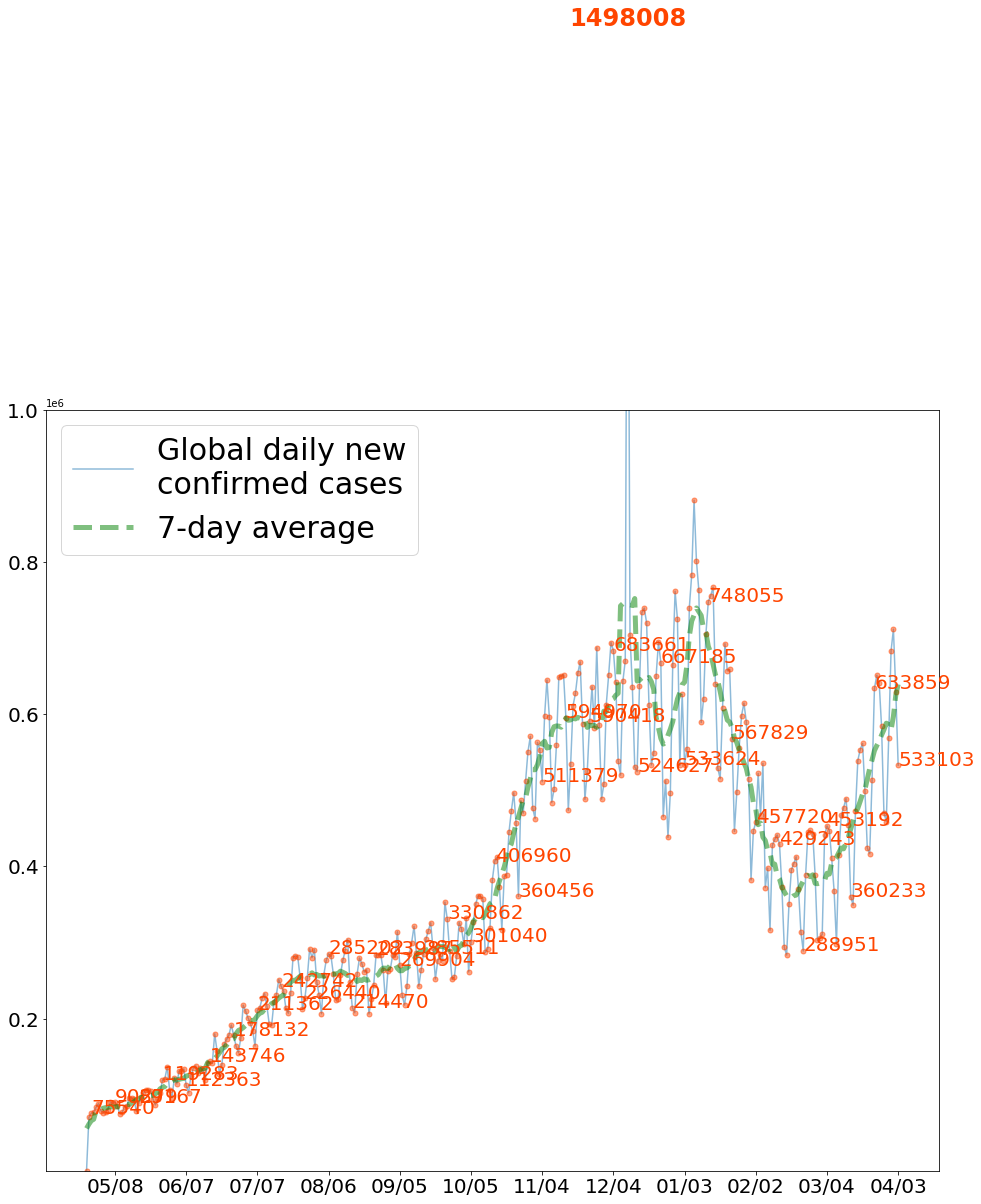

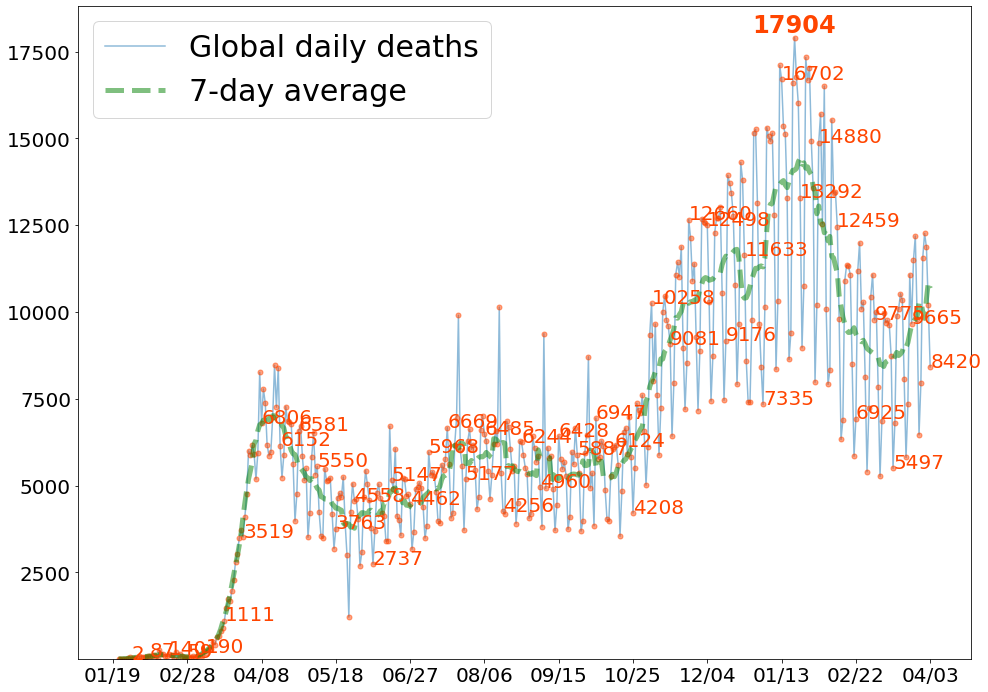

In [10]:
country = 'Global'

# insert allows the user to add the most recent data point from another source by hand
lineplot_cases(country, confirm, date, tick_interval=10, start_case=0, save=True, offset=95, bottom=True, top=1e6, insert = False, log=False, height=14)

lineplot_cases(country, death, date, tick_interval=10, start_case=0, save=False, offset=False, death=True, bottom=True, log=False)

<ipython-input-2-f456bed42899>:40: MatplotlibDeprecationWarning: ScaleBase got an unexpected keyword argument 'basey'. This will become an error in 3.4.
  ax.set_yscale('linear', basey=2)


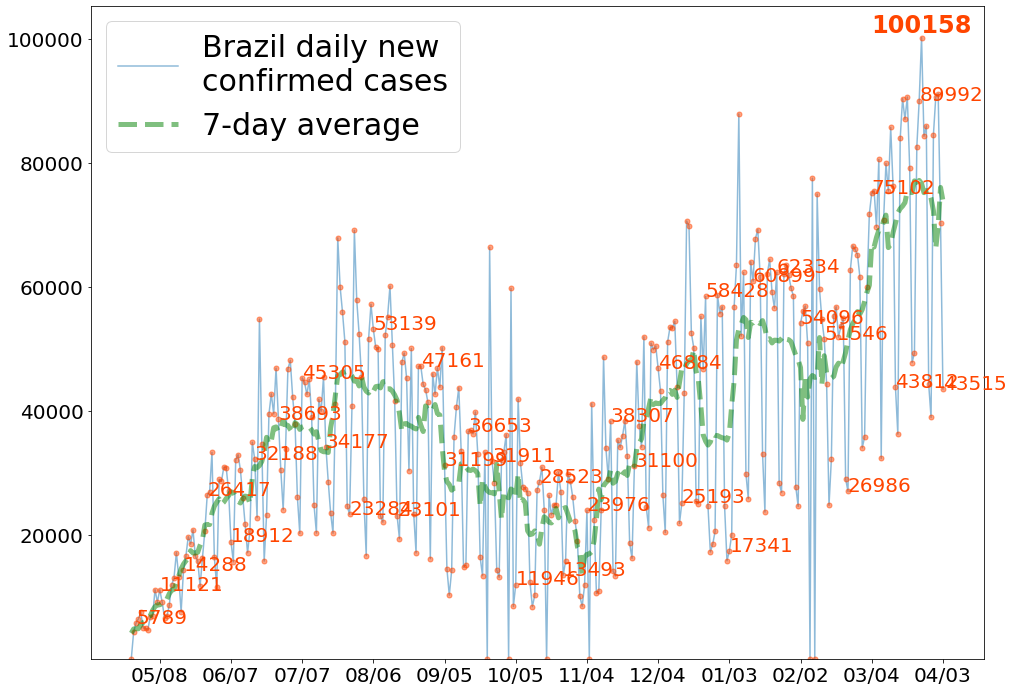

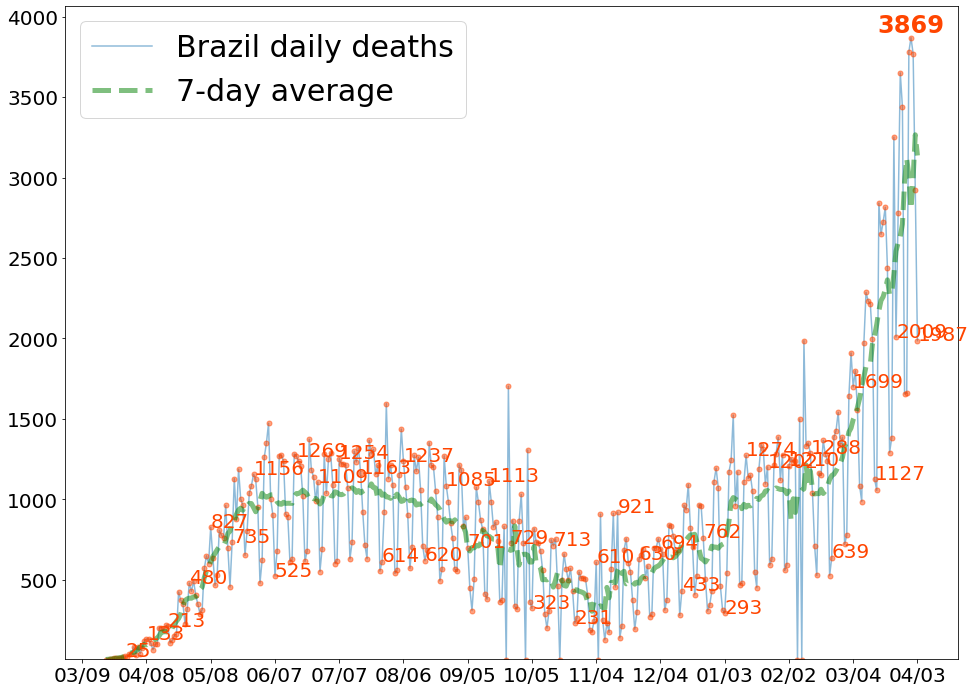

In [11]:
country = 'Brazil'

# insert allows the user to add the most recent data point from another source by hand
lineplot_cases(country, confirm, date, tick_interval=10, start_case=20, save=True, offset=95, bottom=True, insert = False, log=False)

lineplot_cases(country, death, date, tick_interval=10, start_case=10, save=False, offset=False, death=True, bottom=True, log=False)

## CFR progress

In [ ]:
recover = get_global_recovers_total()

country = 'Ireland'
focus = pd.DataFrame()
focus['case'] = confirm[country]
focus['death'] = death[country]
focus['recover'] = recover[country]
focus['cfr'] = focus['death'] / focus['case']
focus['cfr_c'] = focus['death'] / (focus['death']+focus['recover'])
focus['cfr_o'] = focus['death'] / focus['case'].shift(21)

# focus = focus.iloc[-120:]
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(focus['case'].diff().rolling(window=7, min_periods=1, center=True).mean(), label='New cases in %s'%country)
ax.plot(focus['death'].diff().rolling(window=7, min_periods=1, center=True).mean(), ls='--', label='Fatalities in %s'%country)

ax2 = ax.twinx()
ax2.plot(focus['cfr'], 'r', label='nCFR')
ax2.plot(focus['cfr_c'], 'r--', label='CFR by outcome')
ax2.plot(focus['cfr_o'], 'r-.', label='CFR by delay')
ax2.set_ylim(top=0.30, bottom=0)

ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.format_xdata = mdates.DateFormatter('%m-%d')
ax2.tick_params(axis='y', labelcolor='C3',labelsize=20)
ax.legend(loc=0, fontsize=30)
ax.tick_params(labelsize=20)
ax.legend(loc='upper center', fontsize=20)
ax2.legend(loc=0, fontsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
# ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig(r'figures/CFR_ts%s.png'%country, dpi=100) 

NameError: name 'window' is not defined

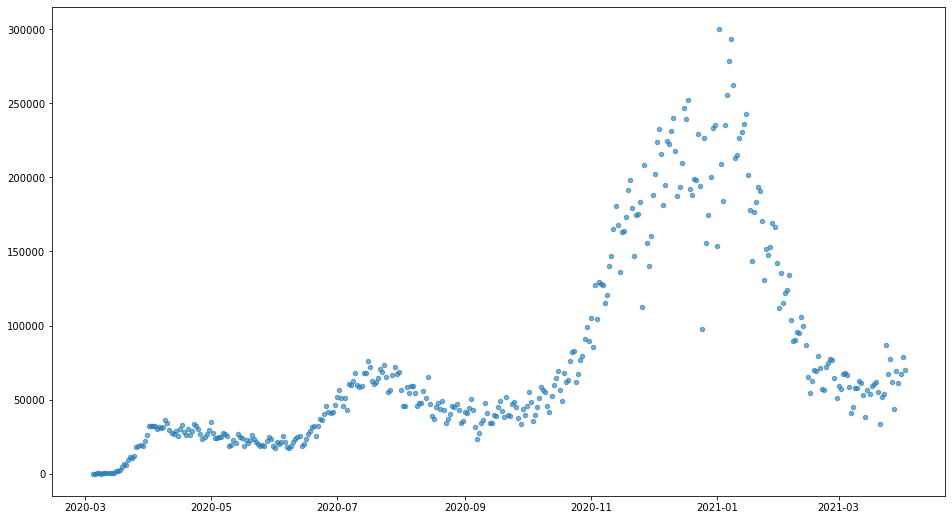

In [13]:
country = 'US'
offset = np.argmax(confirm[country].values >= 100)
focus = pd.DataFrame({'Case':confirm[country],'Death':death[country]})
focus = focus.iloc[offset:]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.scatter(focus.index, focus['Case'].diff(), c='C0',s=20, label='', alpha=0.6)
ax.plot(focus['Case'].diff().rolling(window=window, min_periods=1, center=True).mean(std=2), 
        label='Daily cases in ' + country, c='C0', alpha=0.9, lw=3)

ax2 = ax.twinx()
ax2.scatter(focus.index, focus['Death'].diff(), c='C3',s=20, label='', alpha=0.6)
ax2.plot(focus['Death'].diff().rolling(window=window, min_periods=1, center=True).mean(std=2), 
        label='Daily deaths in ' + country, c='C3', alpha=0.9, lw=3)


ax.grid(alpha=0.5)
ax.tick_params(labelsize=20)
ax.legend(loc='upper left', fontsize=24)
ax.set_ylim(bottom=0, top=focus['Case'].diff().rolling(window=window, min_periods=1, center=True).mean().max() * 1.1)

ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.format_xdata = mdates.DateFormatter('%m-%d')
ax2.tick_params(axis='y', labelcolor='C3',labelsize=20)
ax2.legend(loc='lower right', fontsize=24)
ax2.set_ylim(bottom=0, top=focus['Death'].diff().rolling(window=window, min_periods=1, center=True).mean(std=2).max() * 1.1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.tight_layout()

# plt.savefig(r'figures/Case_and_death_%s.png'% (country+date), dpi=100)
# plt.savefig('figures/Daily_misc_7_6c', dpi=100)

## Conical plot

In [14]:
l_focus = [i for i in europe if i in confirm.sum().sort_values(ascending=False).iloc[:100].index.to_list()]
# l_focus.remove('Ecuador')

change = pd.DataFrame(columns=['4 weeks ago','3 weeks ago','2 weeks ago','1 week ago','now'])

# offset = 35
# for country in confirm.iloc[-1].sort_values(ascending=False).index[:20]:
for country in l_focus:
    offset = np.argmax(confirm[country].values >= 50)
    focus = confirm.loc[:,[country]].copy()[offset:]
    focus['new'] = focus[country].diff()
    focus['average'] = focus['new'].rolling(window=7, min_periods=1, center=True).mean()
    
    change.at[country,'1 week ago'] = focus['average'][-8] / max(focus['average'][-1], 1)
    change.at[country,'2 weeks ago'] = focus['average'][-15] / max(focus['average'][-1], 1)
    change.at[country,'3 weeks ago'] = focus['average'][-22] / max(focus['average'][-1], 1)
    change.at[country,'4 weeks ago'] = focus['average'][-29] / max(focus['average'][-1], 1)
    change.at[country,'now'] = 1   

focus = change.T.copy()

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for i, country in enumerate(l_focus):
    ax.plot(focus[country],'o--', label=country, c='C'+str(i))
    if ' ' in country:
#         name = country.split(' ')[0] + '\n' + country.split(' ')[1]
        name = country
    else:
        name = country
    ax.annotate(name, xy=(-0.1, focus[country][0]), c='C'+str(i),fontsize=20,
               ha='right', va='center', alpha=0.9)
    
ax.set_xlim(left=-0.5)
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
ax.set_ylabel('Weekly average comparing to now',fontsize=20)
ax.yaxis.set_label_position('right')
ax.set_yscale('log', basey=2)
ax.axhspan(ymin=1/8, ymax=1, xmin=0.105, color='brown', alpha=0.15)
ax.grid()

plt.savefig('figures/Daily_misc_8_11.png', dpi=100)

<ipython-input-14-66519e759a88>:41: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale('log', basey=2)


ValueError: Image size of 1139x106531 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1152x648 with 1 Axes>

## Compare 2 countries

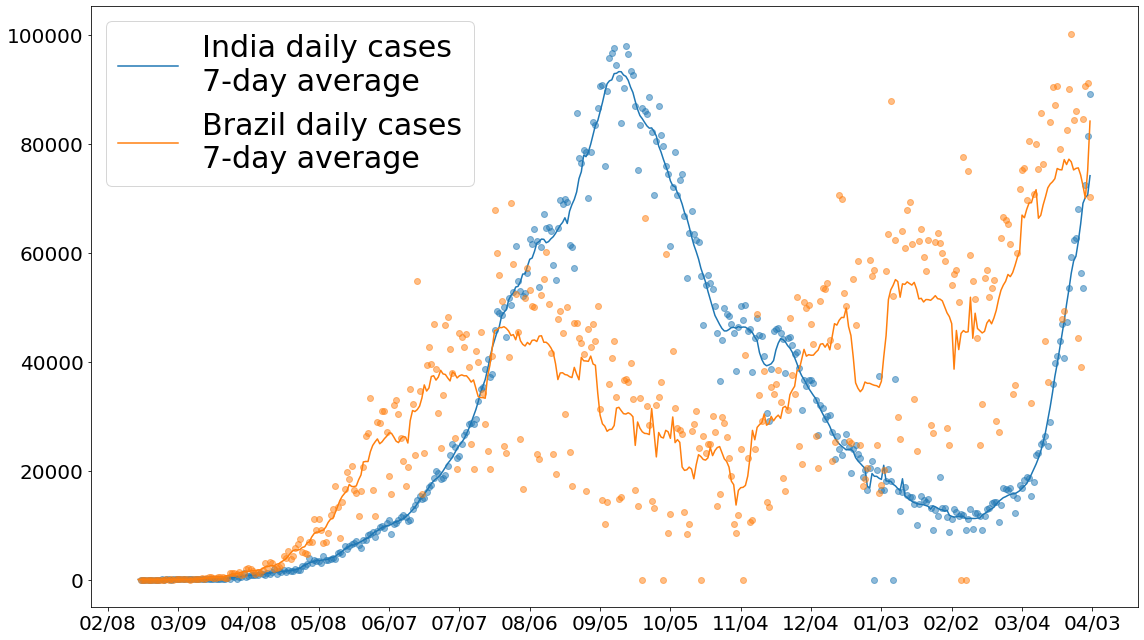

In [15]:
country_1 = 'India'
country_2 = 'Brazil'
offset = 30

focus = confirm[[country_1, country_2]].iloc[offset:].copy()



fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(focus[country_1].diff().rolling(window=7, min_periods=1, center=True).mean(std=2), label='%s daily cases\n7-day average'%country_1)
ax.plot(focus[country_1].diff(),'o', c='C0', alpha=0.5)
ax.plot(focus[country_2].diff().rolling(window=7, min_periods=1, center=True).mean(std=2), label='%s daily cases\n7-day average'%country_2)
ax.plot(focus[country_2].diff(),'o', c='C1', alpha=0.5)

ax.legend(fontsize=20)
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.tight_layout()
plt.savefig(r'figures/Two_country_comparison_%s.png'% (country_1+country_2+date), dpi=100)

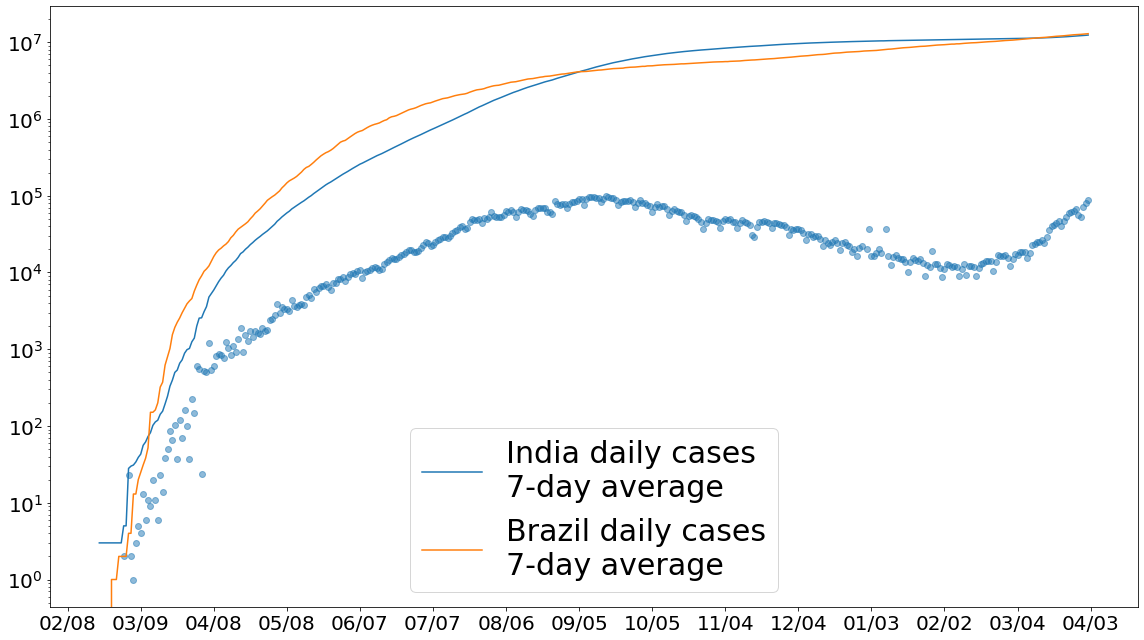

In [16]:
country_1 = 'India'
country_2 = 'Brazil'
offset = 30

focus = confirm[[country_1, country_2]].iloc[offset:].copy()

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(focus[country_1], label='%s daily cases\n7-day average'%country_1)
ax.plot(focus[country_1].diff(),'o', c='C0', alpha=0.5)
ax.plot(focus[country_2], label='%s daily cases\n7-day average'%country_2)

ax.set_yscale('log')
ax.legend(fontsize=20)
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.tight_layout()
# plt.savefig(r'figures/Two_country_comparison_%s.png'% (country_1+country_2+date), dpi=100)

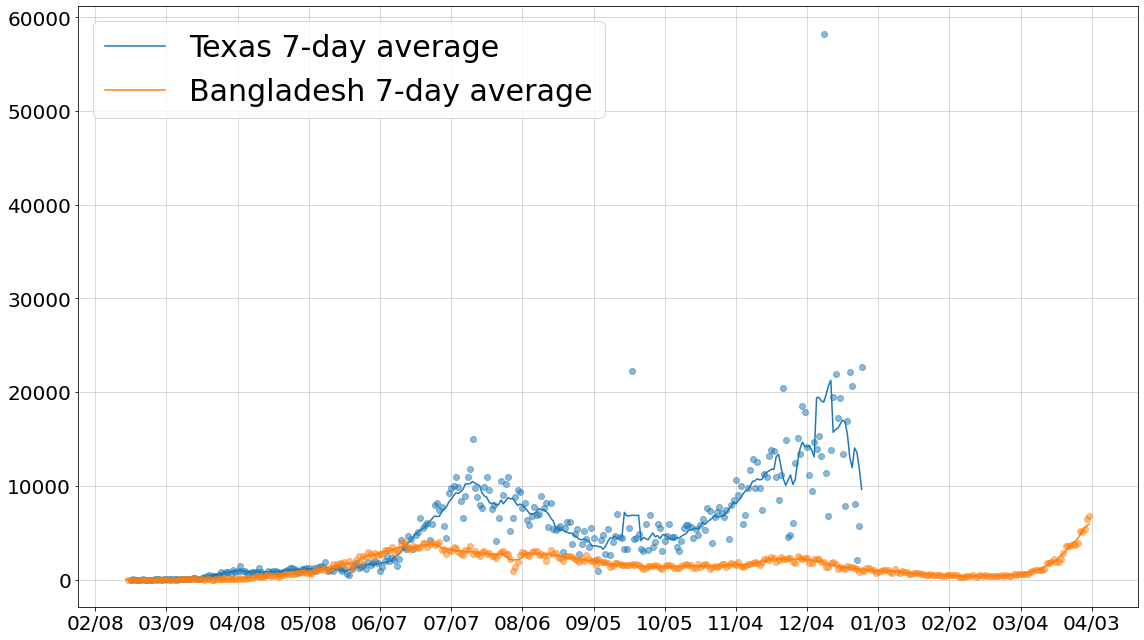

In [17]:
state = 'Texas'
country = 'Bangladesh'

df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df.index = pd.to_datetime(df.index)
t1 = df[state]
t2 = confirm[country][30:]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(t1.diff().rolling(window=7, min_periods=1, center=True).mean(std=2), label='%s 7-day average'%state)
ax.plot(t1.diff(),'o', c='C0', alpha=0.5)
ax.plot(t2.diff().rolling(window=7, min_periods=1, center=True).mean(std=2), label='%s 7-day average'%country)
ax.plot(t2.diff(),'o', c='C1', alpha=0.5)

ax.legend(fontsize=30)
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.tight_layout()
ax.grid(alpha=0.6)
plt.savefig(r'figures/State_vs_country_comparison_%s.png'% (state + country + date), dpi=100)

## Segmented Regression

In [18]:
def linear_fit(x, a, b):
    return  a*x+b

def country_dynamics(category, country, cut, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
    ax.set_yscale('log')
    cum = data[category].copy().T[[country]]
    cum['time'] = pd.to_datetime(cum.index)
    cum.index = cum.time.dt.strftime('%m/%d')
    cum.drop('time', axis=1, inplace=True)
    
    focus = (cum - cum.shift(1)).iloc[cut:,:]
    
#     ax.plot(cum.iloc[cut:,:], alpha=0.8, lw=2, label='Daily Cases in ' + country )
    ax.scatter(focus.index, focus[country], c='gray', s=5, label='Daily cases in %s'%country)
    ax.plot(focus[country].rolling(window=7, min_periods=1, center=True).mean(), c='green',alpha=0.3)
    
    for i,(a,b) in enumerate(days):
        slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
        ax.plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)))
        ax.annotate(np.round(np.exp(slope),3), 
                    xy=((a+b-2)/2, np.exp((a+b+2)/2*slope + intercept)*1.2), fontsize=24, c=('C'+str(i+1)))                    
            
    ax.legend(prop={'size': 30})
    ax.tick_params(labelsize=20)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.format_xdata = mdates.DateFormatter('%m-%d')
    plt.tight_layout()

def country_dynamics_all(country, cut, days):
    fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,12))
    fig.subplots_adjust(wspace=0, hspace=0)
    
    for i,category in enumerate(data.keys()):
        ax[i].set_yscale('log')
        cum = data[category].copy().T[[country]]
        focus = (cum - cum.shift(1)).iloc[cut:,:]

        ax[i].plot(cum.iloc[cut:,:], alpha=0.5, lw=2, label=category + ' cases in ' + country )
        ax[i].scatter(focus.index, focus[country], c='gray', s=5)

        for j,(a,b) in enumerate(days[i]):
            slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
            ax[i].plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(j+1)))
            ax[i].annotate(np.round(np.exp(slope),2), 
                    xy=((a+b-2)/2, np.exp((a+b)/2*slope + intercept)), fontsize=14, c=('C'+str(j+1)))  

        ax[i].legend(prop={'size': 12})
        ax[i].tick_params(labelrotation=90, labelsize=14)
        # ax.xaxis.set_major_locator(plt.MaxNLocator(15))
        plt.tight_layout()
        
def country_dynamics_all_in_one(country, cut, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,10))
    fig.subplots_adjust(wspace=0, hspace=0)
    
    for i,category in enumerate(data.keys()):
        ax.set_yscale('log')
        focus = (cum - cum.shift(1)).iloc[cut:,:]

#         ax.plot(cum.iloc[cut:,:], alpha=0.5, lw=2, label=category + ' cases in ' + country )
        ax.scatter(focus.index, focus[country], c='gray', s=5)

        for j,(a,b) in enumerate(days[i]):
            slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
            ax[i].plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(j+1)))
            ax[i].annotate(np.round(np.exp(slope),2), 
                    xy=((a+b-2)/2, np.exp((a+b)/2*slope + intercept)), fontsize=14, c=('C'+str(j+1)))  

        ax[i].legend(prop={'size': 12})
        ax[i].tick_params(labelrotation=90, labelsize=14)
        # ax.xaxis.set_major_locator(plt.MaxNLocator(15))
        plt.tight_layout()


In [19]:
confirm.index[63]

Timestamp('2020-03-25 00:00:00')

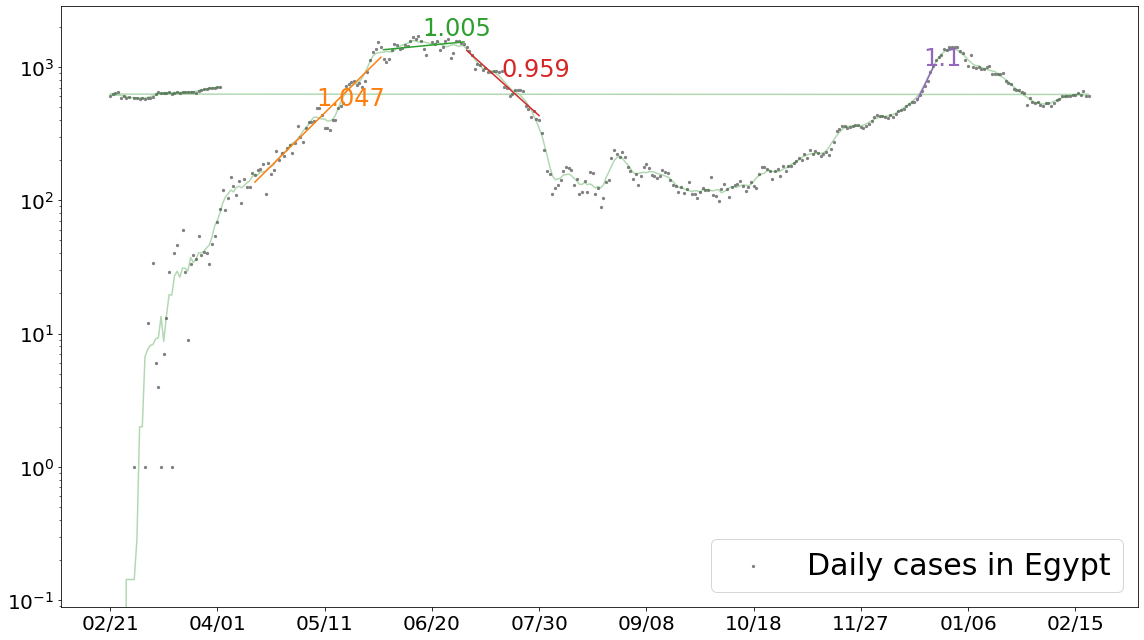

In [20]:
recover = pd.read_csv('data/JH/recover_agg.csv').set_index('Country/Region')
data = {'Confirmed':confirm.T, 'Death':death.T, 'Recovered':recover}

# country_dynamics('Confirmed', 'Australia',40, [(7,24),(24,30),(30,52),(102,127),(127,152),(152,165),(165,203)])
# country_dynamics('Confirmed', 'Austria',35, [(7,16),(16,28),(29,71)])
# country_dynamics('Confirmed', 'Brazil',50, [(10,65)])
# country_dynamics('Confirmed', 'Burma',120, [(90,115)])
# country_dynamics('Confirmed', 'Belgium',20, [(50,130),(175,205),(205,230),(230,260),(260,287)])
# country_dynamics('Confirmed', 'China',0, [(1,8),(8,12),(12,57)])
# country_dynamics('Confirmed', 'Czechia',80, [(140,200),(200,224)])
# country_dynamics('Confirmed', 'Colombia',30, [(50,125),(125,173)])
# country_dynamics('Confirmed', 'Denmark',30, [(280,302)])
country_dynamics('Confirmed', 'Egypt',30, [(54,102),(102,133),(133,161),(301,308)])
# country_dynamics('Confirmed', 'Ethiopia',30, [(54,102),(102,133),(140,178)])
# country_dynamics('Confirmed', 'France', 35, [(2,31),(182,253),(253,280)])
# country_dynamics('Confirmed', 'Germany',35, [(2,24),(24,32),(32,37),(37,64),(64,66)])
# country_dynamics('Confirmed', 'Greece',35, [(260,301)])


# country_dynamics('Confirmed', 'Italy',28, [(3,23),(23,38),(39,68),(182,187)])
# country_dynamics('Confirmed', 'Iran',28, [(3,14),(16,30),(31,38),(39,68)])
# country_dynamics('Confirmed', 'Ireland',40, [(23,45),(45,113),(113,229),(229,254),(254,264)])
# country_dynamics('Confirmed', 'India',28, [(23,48),(48,110),(110,163),(163,195),(195,200)])
# country_dynamics('Confirmed', 'Israel',28, [(7,40),(40,65),(65,85),(95,140),(140,190),(190,218),(218,232)])
# country_dynamics('Confirmed', 'Indonesia',28, [(137,180)])
# country_dynamics('Confirmed', 'Italy',30, [(1,8),(8,18),(19,30),(29,70),(69,90)])
# country_dynamics('Confirmed', 'Jordan',48, [(170,188)])
# country_dynamics('Confirmed', 'Norway',35, [(2,20),(24,32),(32,39)])
# country_dynamics('Confirmed', 'Malaysia',35, [(6,28),(208,223)])
# country_dynamics('Confirmed', 'Netherlands',35, [(6,28),(185,212)])
# country_dynamics('Confirmed', 'New Zealand',35, [(7,33),(36,57),(185,212)])
# country_dynamics('Confirmed', 'Nepal',35, [(145,176),(176, 203)])
# country_dynamics('Confirmed', 'Poland',45, [(2,14),(14,29),(29,91),(91,122),(122,154)])
# country_dynamics('Confirmed', 'Russia',45, [(18,44),(44,57),(57,174),(174,200),(200,219)])
# country_dynamics('Confirmed', 'Spain',35, [(2,16),(17,30),(30,44)])
# country_dynamics('Confirmed', 'Switzerland',35, [(2,15),(22,42),(42,90)])

# country_dynamics('Confirmed', 'Singapore',35, [(39,54)])
# country_dynamics('Confirmed', 'Slovakia',115, [(116,167),(167,189)])
# country_dynamics('Confirmed', 'Slovenia',115, [(141,162)])
# country_dynamics('Confirmed', 'Saudi Arabia',45, [(42,116),(116,208),(208,245),(245,272)])
# country_dynamics('Confirmed', 'Turkey',50, [(4,11),(11,16),(16,31),(31,41),(41,47)])
# country_dynamics('Confirmed', 'Tunisia',50, [(150,192)])
# country_dynamics('Confirmed', 'United Kingdom',35, [(5,31),(31,44)])
# country_dynamics('Confirmed', 'United Arab Emirates',35, [(168,199)])
# country_dynamics('Confirmed', 'Ukraine',35, [(120,145),(145,179)])
# country_dynamics('Confirmed', 'Uruguay',35, [(270, 291)])
# country_dynamics('Confirmed', 'US',35,  [(2,14),(14,27),(27,39),(39,45),(45,105),(106,135),(135,198),(198,235),(235,258)])
# country_dynamics('Confirmed', 'Venezuela',35, [(106,167)])
# plt.savefig(r'figures/Trend_Denmark%s.png'%date, dpi=100)

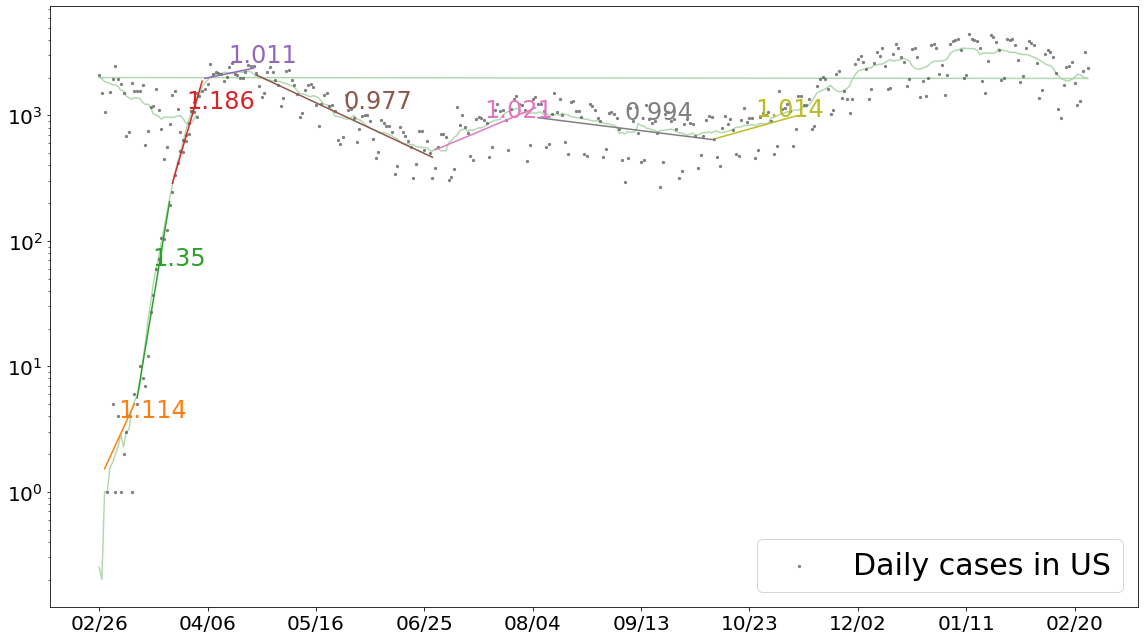

In [21]:
recover = pd.read_csv('data/JH/recover_agg.csv').set_index('Country/Region')
data = {'Confirmed':confirm.T, 'Death':death.T, 'Recovered':recover}

# country_dynamics('Death', 'Australia',40, [(7,20),(21,30),(30,36)])
# country_dynamics('Death', 'Austria',35, [(7,16),(16,28),(29,42)])
# country_dynamics('Death', 'Brazil',28, [(3,14),(16,30),(31,38),(39,56)])
# country_dynamics('Death', 'China',0, [(1,8),(8,14),(14,28),(29,45)])
# country_dynamics('Death', 'France',35, [(3,32),(32,39)])
# country_dynamics('Death', 'Germany',35, [(2,24),(24,32),(32,39)])

# country_dynamics('Death', 'India',28, [(23,48),(48,110),(110,163),(163,195)])
# country_dynamics('Death', 'Iran',28, [(3,14),(16,30),(31,38),(39,56)])
# country_dynamics('Death', 'Ireland',40, [(25,48),(48,84)])
# country_dynamics('Death', 'Israel',40, [(9,28),(29,36)])
# country_dynamics('Death', 'Italy',30, [(2,16),(16,30),(32,61)])
# country_dynamics('Death', 'Norway',35, [(2,20),(24,32),(32,39)])

# country_dynamics('Death', 'Russia',30, [(33,50)])
# country_dynamics('Death', 'Spain',40, [(2,16),(18,27),(26,47),(48,57)])
# country_dynamics('Death', 'Switzerland',35, [(2,15),(22,42),(42,45)])

# country_dynamics('Death', 'Turkey',55, [(7,17),(16,32),(31,47)])
# country_dynamics('Death', 'United Kingdom',35, [(5,31),(31,35),(35,58)])
country_dynamics('Death', 'US',35,  [(2,14),(14,27),(27,39),(39,58),(58,124),(124,162),(162,228),(228,258)])

# plt.savefig(r'figures/Trend_death_Turkey_%s.png'%date, dpi=100)

## Active cases

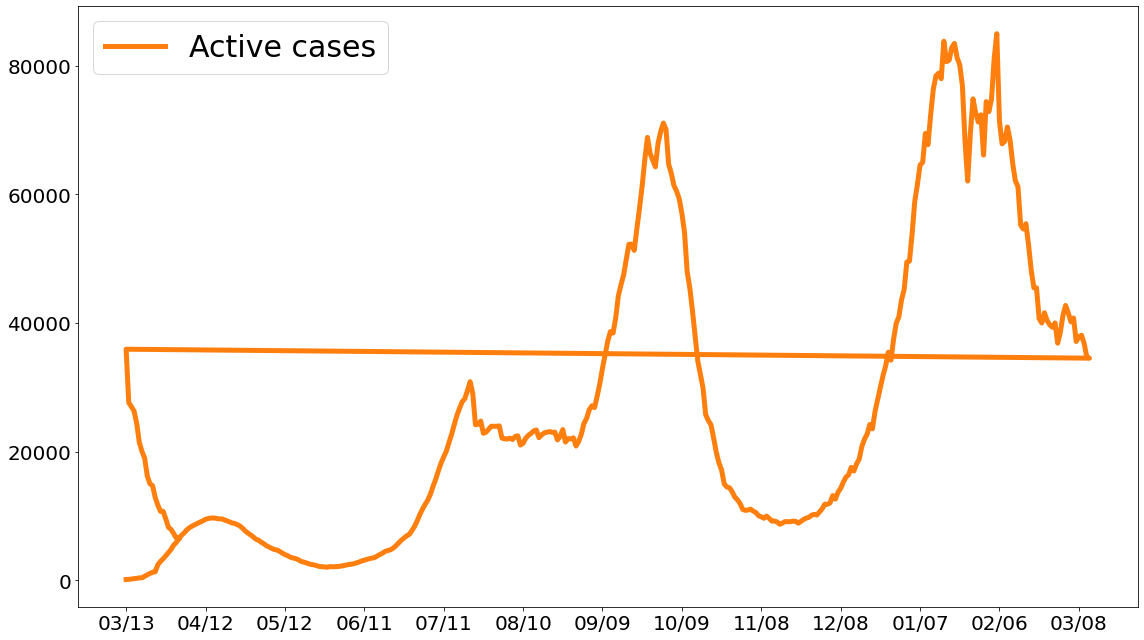

In [22]:
confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region')
death = pd.read_csv('data/JH/death_agg.csv').set_index('Country/Region')
recover = pd.read_csv('data/JH/recover_agg.csv').set_index('Country/Region')
data = {'Confirmed':confirm, 'Death':death, 'Recovered':recover}

fig, ax = plt.subplots(figsize=(16,9))
country = 'Israel'
offset = np.argmax(confirm.T[country].values >= 100)


focus = pd.DataFrame()
focus = focus.append(confirm.T[country][offset:]).append(death.T[country][offset:]).append(recover.T[country][offset:]).T
focus.columns = ['Confirm','Death','Recover']
focus['Active'] = focus['Confirm'] - focus['Death'] - focus['Recover']

focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
focus.drop('time', axis=1, inplace=True)

# ax.plot(focus['Recover'], c='C2', lw=5, label='Recovered cases in '+ country)
# ax.plot(focus['Death'], c='C3', lw=5, label='Deaths')
ax.plot(focus['Active'], c='C1', lw=5, label='Active cases')

ax.tick_params(labelsize=20)
ax.legend(loc=2, fontsize=30)


plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.format_xdata = mdates.DateFormatter('%m-%d')

# plt.savefig(r'figures/Active_case_%s.png' %(country+date), dpi=100)

# Google mobility

In [23]:
df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
df.index = pd.to_datetime(df.date)
# df['date'] = pd.to_datetime(df.date)
# df.index = df.date.dt.strftime('%m/%d')
df.drop('date', axis=1, inplace=True)

mobility = df[(df['sub_region_1'].isnull()) & (df['sub_region_2'].isnull())]
mobility = mobility.replace({'United States':'US',
                             'South Korea':'Korea, South',
                            'The Bahamas':'Bahamas',
                            'Cape Verde':'Cabo Verde',
                            "Côte d'Ivoire":"Cote d'Ivoire",
                            'Myanmar (Burma)':'Burma'})

mobility_us_state = df[(df.country_region == 'United States') & df.sub_region_1.notnull() & df.sub_region_2.isnull()]

/home/blake/miniconda3/envs/variants/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
country = 'US'
offset = 40
temp = mobility[mobility['country_region']==country].drop(['country_region','country_region_code','sub_region_1','sub_region_2',
                                                          'parks_percent_change_from_baseline',
                                                           'residential_percent_change_from_baseline',
                                                           'grocery_and_pharmacy_percent_change_from_baseline',],
                                                         axis=1).iloc[offset:].copy()
focus = confirm.diff()[[country]].merge(temp, left_on=confirm.index, right_on=temp.index, how='left').set_index('key_0')
focus = focus.iloc[focus.index.get_loc(temp.index[0]):]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(focus[country],'o',c='C0',alpha=0.4)
ax.plot(focus[country].rolling(window=7, min_periods=1, center=True).mean(),c='C0',lw=3, label='Daily cases in\n%s'%country, alpha=0.8)

ax.tick_params(labelsize=20)
ax.legend(loc='upper left', fontsize=30)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_ylim(top=focus[country].rolling(window=7, min_periods=1, center=True).mean().max()*1.1)

ax2 = ax.twinx()
for i, category in enumerate(list(focus)[3:]):
    ax2.plot(focus[category],  c='C'+str(i+2), alpha=0.25)
    ax2.plot(focus[category].rolling(window=7, min_periods=1, center=True).mean(), c='C'+str(i+2),alpha=0.8, label=category.split('_per')[0],)

#     ax2.plot(temp.index, temp[i].rolling(window=7, min_periods=1, center=True).mean(),label=i.split('_percent')[0])

ax2.legend(fontsize=24, loc='upper right')
ax2.set_ylabel('Mobility change compared to baseline', color='C1', fontsize=18)
ax2.axhline(y=0, c='C1',lw=3, ls='--',alpha=0.3)
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.tick_params(labelsize=20)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax2.xaxis.set_major_locator(plt.MaxNLocator(15))
ax2.set_ylim(bottom=-100, top=50)
ax.set_ylim(bottom=0)
plt.tight_layout()
# plt.show()
# plt.savefig(r'figures/Mobility_%s.png'%(country+date),dpi=100)

KeyError: "None of [Index(['US'], dtype='object')] are in the [columns]"

In [ ]:
country = 'Vermont'
offset = 20
temp = mobility_us_state[mobility_us_state['sub_region_1']==country].drop(['country_region','country_region_code','sub_region_1','sub_region_2',
                                                          'parks_percent_change_from_baseline',
                                                           'residential_percent_change_from_baseline',
                                                           'grocery_and_pharmacy_percent_change_from_baseline',],
                                                         axis=1).iloc[offset:].copy()

df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df.index = pd.to_datetime(df.index)
# df['time'] = pd.to_datetime(df.index)
# df.index = df.time.dt.strftime('%m/%d')
# df.drop('time', axis=1, inplace=True)

focus = df.diff()[[country]].merge(temp, left_on=df.index, right_on=temp.index, how='left').set_index('key_0')
# focus = focus.iloc[focus.index.get_loc(temp.index[0]):]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(focus[country],'o',c='C0',alpha=0.4)
ax.plot(focus[country].rolling(window=7, min_periods=1, center=True).mean(),c='C0',lw=3, label='Daily cases in\n%s'%country, alpha=0.8)

ax.tick_params(labelsize=20)
ax.legend(loc='upper left', fontsize=30)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_ylim(bottom=-100, top=focus[country].rolling(window=7, min_periods=1, center=True).mean().max()*1.1)

ax2 = ax.twinx()
for i, category in enumerate(list(focus)[3:]):
    ax2.plot(focus[category],  c='C'+str(i+2), alpha=0.25)
    ax2.plot(focus[category].rolling(window=7, min_periods=1, center=True).mean(), c='C'+str(i+2),alpha=0.8, label=category.split('_per')[0],)

#     ax2.plot(temp.index, temp[i].rolling(window=7, min_periods=1, center=True).mean(),label=i.split('_percent')[0])

ax2.legend(fontsize=24, loc='lower right')
ax2.set_ylabel('Mobility change compared to baseline', color='C1', fontsize=18)
ax2.axhline(y=0, c='C1',lw=3, ls='--',alpha=0.3)
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.tick_params(labelsize=20)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax2.xaxis.set_major_locator(plt.MaxNLocator(15))
ax2.set_ylim(bottom=-100, top=50)

plt.tight_layout()
# plt.show()
plt.savefig(r'figures/Mobility_%s.png'%(country+date),dpi=100)

# NYT US data

In [ ]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)

country = 'Massachusetts'
offset = np.argmax(df[country].fillna(0).values >= 20)

focus =  df.loc[:,[country]].copy()[offset: ]
focus['new'] = focus[country] - focus[country].shift(1)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in ' + country, alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')

window = 7
focus['average'] = focus['new'].rolling(window=window, min_periods=1, center=True).mean()
ax.plot(focus.index, focus.average, 'g--', lw=5, alpha=0.5, label='%d days average'%window)

for i, v in enumerate(focus.new):
    if v == focus.new.max():
        ax.text(focus.index[i], v+0.3, str(int(v)), ha='center',va='bottom',color='orangered', fontsize=24, fontweight='bold')
    elif v > 0 and v not in [5974,4050,5210,4668,3590,9320, 6549,366,259,266] and (len(focus) - i)%10==1:
        ax.text(i, v+0.3, str(int(v)), ha='center', color='orangered', fontsize=20)

# ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=30)
ax.set_ylim(bottom=0)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig(r'figures/%s.png'% (country+date), dpi=100)

In [ ]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)
df = df.drop('Guam', axis=1).iloc[:,:-2]
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


change = pd.DataFrame(columns=['4 weeks ago','3 weeks ago','2 weeks ago','1 week ago','now'])

# offset = 35
# for country in confirm.iloc[-1].sort_values(ascending=False).index[:20]:
for country in list(df):
#     offset = np.argmax(confirm[country].values >= 50)
    offset=15
    focus = df.loc[:,[country]].copy()[offset:]
    focus['new'] = focus[country].diff()
    focus['average'] = focus['new'].rolling(window=7, min_periods=1, center=True).mean()
    
    change.at[country,'now'] = focus['average'][-1] / max(focus['average'][-1], .1)
    change.at[country,'1 week ago'] = focus['average'][-8] / max(focus['average'][-1], .1)
    change.at[country,'2 weeks ago'] = focus['average'][-15] / max(focus['average'][-1], .1)
    change.at[country,'3 weeks ago'] = focus['average'][-22] / max(focus['average'][-1], .1)
    change.at[country,'4 weeks ago'] = focus['average'][-29] / max(focus['average'][-1], .1)
    

focus = change.T.copy()

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for i, country in enumerate(df):
    if focus.mean().loc[country] < 1:
        ax.plot(focus[country],'o--', label=country, c='C'+str(i), alpha=0.7)
        if ' ' in country:
    #         name = country.split(' ')[0] + '\n' + country.split(' ')[1]
            name = country
        else:
            name = country
        ax.annotate(us_state_abbrev[name], xy=(-(i%5)/7, focus[country][0]), c='C'+str(i),fontsize=20,
                   ha='right', va='center', alpha=0.9)
    
ax.set_xlim(left=-1)
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
ax.set_ylabel('Weekly average comparing to now',fontsize=20)
ax.yaxis.set_label_position('right')
ax.set_yscale('log', basey=2)
ax.axhspan(ymin=1/10, ymax=1, xmin=0.19, color='brown', alpha=0.15)
ax.grid()

# plt.savefig('figures/Daily_misc_6_14.png', dpi=100)

In [ ]:
focus = df.copy().iloc[15:]

for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
    focus[i] = focus[i].rolling(window=window, min_periods=1, center=True).mean()


fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
for i in list(focus)[3:10]:
    ax.plot(focus.index, focus[i], label=i, alpha=0.7)
# ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=20)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))


# COVIDtracking data

In [ ]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
# df.iloc[0]['date']

focus_state='CA'
focus = df[df['state']==focus_state].set_index('date').sort_index().iloc[8:]
focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
focus.index = focus.time.dt.strftime('%m/%d')
focus = focus.iloc[100:]
                                
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
ax.bar(x=focus.index, height=focus['positiveIncrease'],label='Daily new positives in '+focus_state)
ax.legend(fontsize=20, loc=2)

ax2 = ax.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Positive rate', color=color, fontsize=18)
ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color='lime', label='Daily positive rate')
ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color, label='Total positive rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax2.legend(loc='upper right', fontsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.tight_layout()
plt.savefig(r'figures/%s_pos_rate.png'%(focus_state + date), dpi=100)

In [ ]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
df.iloc[0]['date']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

focus = df.groupby('date').agg(sum).copy()
focus.index = pd.date_range(end=pd.to_datetime(str(df['date'][0])),periods=len(focus), freq='D')

ax.plot(focus.index, focus['positive'], lw=5, label='Case count in the US')
ax.plot(focus.index, focus['total'], lw=5, label='Test count in the US')
ax.set_yscale('log')
ax.legend(fontsize=26)
# ax.annotate('dfsdf',xy=(5, 500))
plt.tick_params(axis='both', which='major', rotation=45, labelsize=18)

ax2 = ax.twinx()
color = 'tab:green'
ax2.set_ylabel('Positive rate', color=color, fontsize=20)
ax2.plot(focus.index[5:], (focus['positive']/focus['total']*100)[5:], ls='--', lw=4, color=color, label='Cumulative positive rate')
ax2.plot(focus.index[5:], (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100)[5:], 'o-', lw=2, color=color, label='Daily positive rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,40)

plt.tick_params(axis='both', which='major', labelsize=20)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()

# plt.savefig('figures/US_pos_rate_4_13.png', dps=600)

# Positive rate dynamics

In [ ]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)

focus = df.groupby('date').agg(sum).copy()
focus['time'] = pd.to_datetime(focus.index, format='%Y%m%d')
focus.index = focus.time.dt.strftime('%m/%d')
focus = focus.iloc[50:]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in US', color='steelblue', alpha=0.8)
ax.bar(x=focus.index, height=focus['positiveIncrease'],label='Daily new positives in US', color='khaki', alpha=0.8)
ax.plot(focus.index, focus['inIcuCurrently'], ls='--',lw=3, color='darkgreen', label='ICU cases')
ax.legend(fontsize=24)

ax2 = ax.twinx()
color = 'orangered'
ax2.set_ylabel('Daily positive rate', color=color, fontsize=18)
ax2.plot(focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, ls=':', lw=2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.savefig(r'figures/Positive_rate_US_%s.png'%date, dps=100)
print(focus.index[-1])
print(focus['positiveIncrease'][-1]  / focus['totalTestResultsIncrease'][-1]  * 100)

In [ ]:
plt.plot(focus['positiveIncrease'].rolling(window=7, min_periods=1, center=True).mean())
plt.plot(focus['hospitalizedIncrease'].rolling(window=7, min_periods=1, center=True).mean()*15)
# plt.plot((focus['hospitalizedIncrease']/focus['positiveIncrease']).rolling(window=7, min_periods=1, center=True).mean()*150000)

In [ ]:
focus.columns

In [ ]:
plt.plot(focus[ 'hospitalizedCurrently'].rolling(window=7, min_periods=1, center=True).mean())
plt.plot(focus['deathIncrease'].rolling(window=7, min_periods=1, center=True).mean()*35)
plt.plot(focus['recovered'].diff().rolling(window=7, min_periods=1, center=True).mean())

In [ ]:
s = '1-5iveo3Bhf0dY5J6-THcffVPapKyJjJ9SSBXstUzmns'
gid = '&gid=81743903'
path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path, skiprows=[1]).set_index(['Italy']).iloc[7:,21:]
focus = df.copy()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')

ax.bar(x=focus.index, height=focus['New Tested'],label='Daily new tests in Italy', color='steelblue', alpha=0.8)
ax.bar(x=focus.index, height=focus['New Confirmed'],label='Daily new positives in Italy', color='khaki', alpha=0.8)
ax.plot(focus.index, focus['ICU'], ls='--',lw=3, color='darkgreen', label='ICU cases')
ax.legend(loc=0, fontsize=24)

ax2 = ax.twinx()
color = 'orangered'
ax2.set_ylabel('Daily positive rate', color=color, fontsize=20)
ax2.plot(focus['New Confirmed']/focus['New Tested']*100, ls=':', lw=2, color=color, label='Dailay positive rate')
# ax2.legend(fontsize=16)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.savefig(r'figures/Positive_rate_Italy_%s.png'%date, dps=600)

In [ ]:
s = '1-5iveo3Bhf0dY5J6-THcffVPapKyJjJ9SSBXstUzmns'
gid = '&gid=1997012158'
path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path, skiprows=[1,2,3]).set_index('UK')
focus = df.copy()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')

ax.bar(x=focus.index, height=focus['New Tested'],label='Daily new tests in UK', color='steelblue', alpha=0.8)
ax.bar(x=focus.index, height=focus['New Confirmed'],label='Daily new positives in UK', color='khaki', alpha=0.8)
# ax.plot(focus.index, focus['ICU'], ls='--',lw=3, color='orangered', label='ICU cases')
ax.legend(loc=2, fontsize=24)

ax2 = ax.twinx()
color = 'orangered'
ax2.set_ylabel('Daily positive rate', color=color, fontsize=18)
ax2.plot(focus['New Confirmed']/focus['New Tested']*100, ls=':', lw=2, color=color, label='Dailay positive rate')
# ax2.legend(fontsize=16)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.savefig(r'figures/Positive_rate_UK_%s.png'%date, dps=600)

In [ ]:
s = '1-5iveo3Bhf0dY5J6-THcffVPapKyJjJ9SSBXstUzmns'
gid = '&gid=1083654761'

path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path, skiprows=[1,2,3,4]).set_index('Russia')
focus = df.copy().dropna(how='all')
focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
# focus = focus.iloc[:,-10:]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.bar(x=focus.index, height=focus['New Tested'],label='Daily new tests in Russia', color='steelblue', alpha=0.8)
ax.bar(x=focus.index, height=focus['New Confirmed'],label='Daily new positives in Russia', color='khaki', alpha=0.8)

ax.legend(fontsize=24, loc=2)

ax2 = ax.twinx()
color = 'orangered'
ax2.set_ylabel('Daily positive rate', color=color, fontsize=18)
ax2.plot(focus['New Confirmed']/focus['New Tested']*100, ls=':', lw=2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.savefig(r'figures/Positive_rate_Russia_%s.png'%date, dps=600)

In [ ]:
s = '1-5iveo3Bhf0dY5J6-THcffVPapKyJjJ9SSBXstUzmns'
gid = '&gid=813077865'
path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path, skiprows=[1]).set_index('Turkey')
focus = df.copy().iloc[7:]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')

ax.bar(x=focus.index, height=focus['New Tested'],label='Daily new tests in Turkey', color='steelblue', alpha=0.8)
ax.bar(x=focus.index, height=focus['New Confirmed'],label='Daily new positives in Turkey', color='khaki', alpha=0.8)
ax.plot(focus.index, focus['ICU'], ls='--',lw=3, color='darkgreen', label='ICU cases')
ax.legend(loc=2, fontsize=24)

ax2 = ax.twinx()
color = 'orangered'
ax2.set_ylabel('Daily positive rate', color=color, fontsize=18)
ax2.plot(focus['New Confirmed']/focus['New Tested']*100, ls=':', lw=2, color=color, label='Dailay positive rate')
# ax2.legend(fontsize=16)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.savefig(r'figures/Positive_rate_Turkey_%s.png'%date, dps=600)

In [ ]:
s = '1nhZ0LaPdxgniyJa22MpqgQxUM88AIgSgJagyyA-VjGU'
gid = '&gid=349991176'
path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path, skiprows=[1]).set_index('South \nKorea')
focus = df.copy()
focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
focus = focus.iloc[30:,-6:]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.bar(x=focus.index, height=focus['daily test'],label='Daily new tests in South Korea', color='steelblue', alpha=0.8)
ax.bar(x=focus.index, height=focus['New daily'],label='Daily new positives in South Korea', color='khaki', alpha=0.8)
ax.legend(fontsize=24)

ax2 = ax.twinx()
color = 'tab:red'
ax2.set_ylabel('Daily positive rate', color=color, fontsize=18)
ax2.plot(focus['New daily']/focus['daily test']*100, ls=':', lw=2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.tight_layout()
plt.savefig(r'figures/Positive_rate_dynamics_South Korea_%s.png'%date, dps=600)

## Russia wiki data format correction

In [ ]:
s = '1nhZ0LaPdxgniyJa22MpqgQxUM88AIgSgJagyyA-VjGU'
gid = '&gid=559869951'

path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path,skiprows=[0]).set_index('Unnamed: 0').fillna(0).iloc[:,:-9]
df[df.sum().sort_values(ascending=False).index].to_clipboard()

## Spain wiki data format correction

In [ ]:
# https://docs.google.com/spreadsheets/d/1nhZ0LaPdxgniyJa22MpqgQxUM88AIgSgJagyyA-VjGU/edit#gid=2004151289
    
s = '1nhZ0LaPdxgniyJa22MpqgQxUM88AIgSgJagyyA-VjGU'
gid = '&gid=2004151289'

path = 'https://docs.google.com/spreadsheets/d/' + s + '/export?format=csv&id=' + s + gid

df = pd.read_csv(path,skiprows=[1]).set_index('Reported by').iloc[16:,1:-3].fillna(0)
for i in list(df):
    df[i] = df[i].astype(int)
    
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', inplace=True, axis=1)

focus = df[df.iloc[:,:-6].sum().sort_values(ascending=False).index.to_list() + list(df)[-6:]]
focus.index.rename('Spain', inplace=True)
focus.to_clipboard()

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus['New Confirmed'], label='Daily New Confirmed Cases\n in Spain (by PCR)', alpha=0.7)


ax.scatter(focus.index, focus['New Confirmed'], c='orangered',s=20, )
ax.plot(focus.index, focus['New Confirmed'].rolling(window=7, min_periods=1, center=True).mean(), 
        'g--', lw=5, alpha=0.5, label='7 days average')


for i, v in enumerate(focus['New Confirmed']):
    if v > 0 and v not in [5974,4050,5210,4668,3590,9320, 6549,366,259,266] and (len(focus) - i)%2:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

# # ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig(r'figures/%s.png'% ('Spain'+date), dpi=100)

# Relative fire map

Index(['2020/01/22', '2020/01/23', '2020/01/24', '2020/01/25', '2020/01/26',
       '2020/01/27', '2020/01/28', '2020/01/29', '2020/01/30', '2020/01/31',
       ...
       '2021/03/25', '2021/03/26', '2021/03/27', '2021/03/28', '2021/03/29',
       '2021/03/30', '2021/03/31', '2021/04/01', '2021/04/02', '2021/04/03'],
      dtype='object', name='time', length=438)


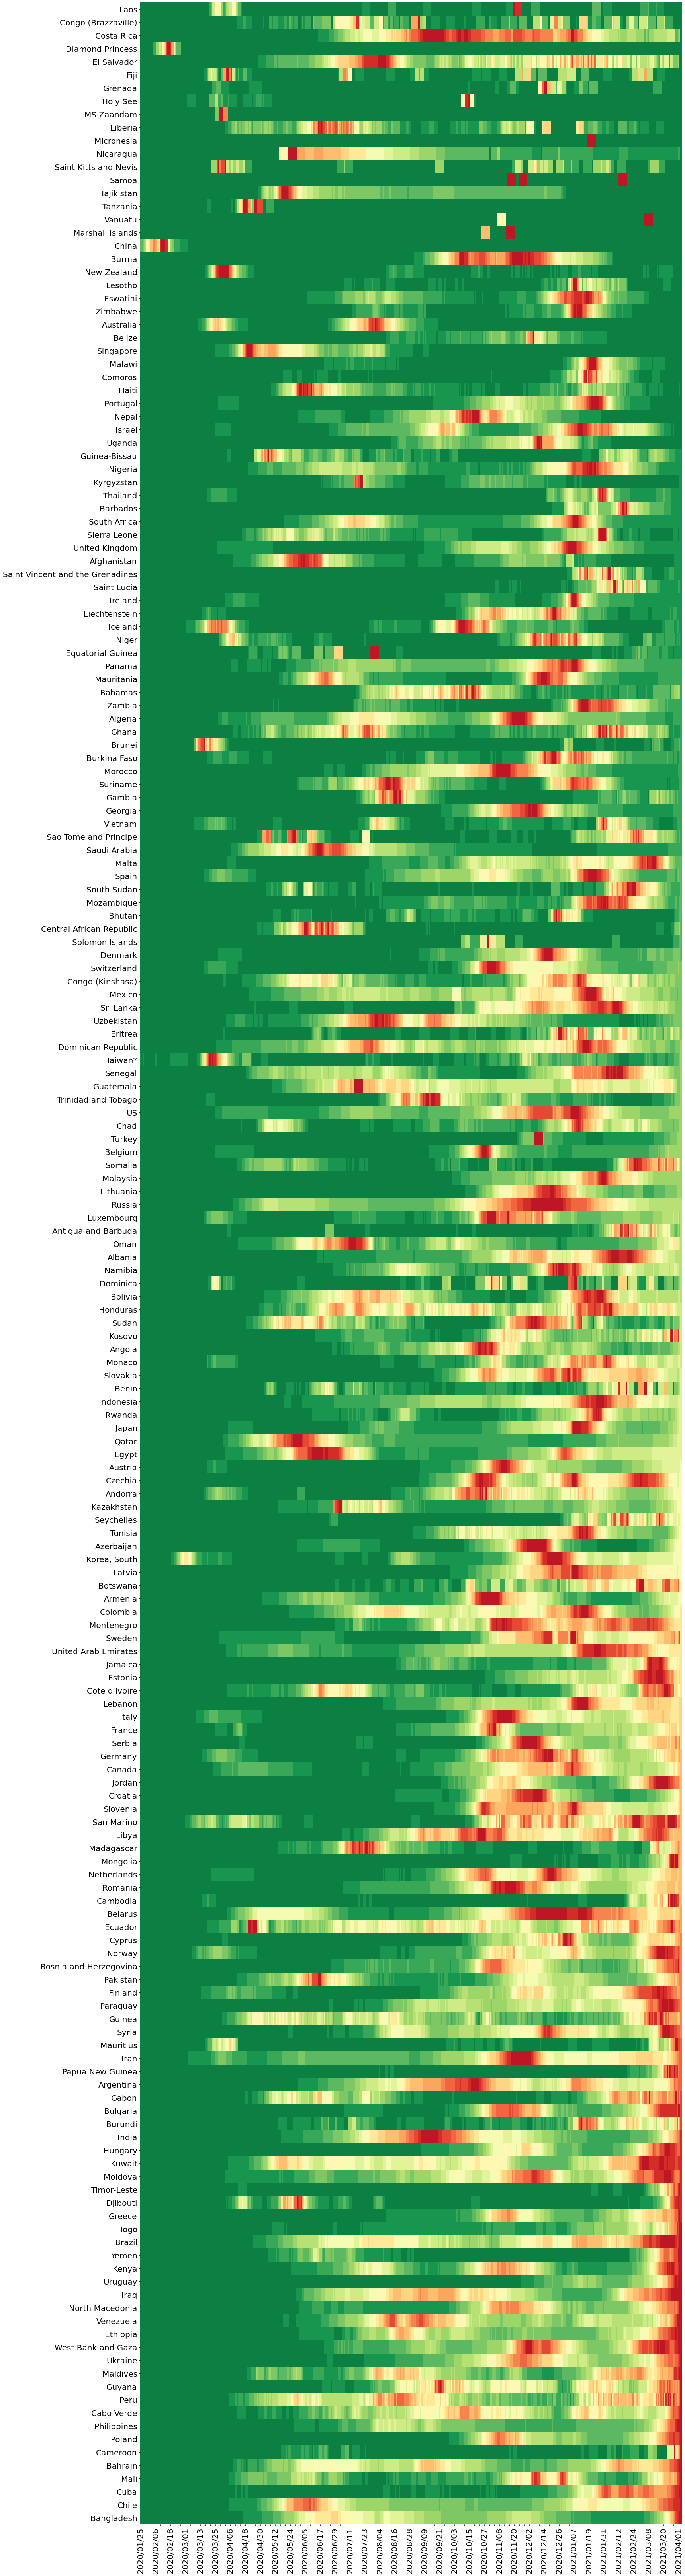

In [73]:
from pdb import set_trace as b
df = pd.read_csv('data/JH/daily_new_case.csv').set_index('Unnamed: 0').clip(lower=0)
# df.drop(['Taiwan*','Diamond Princess','MS Zaandam','Tanzania','Niger'], axis=1, inplace=True)
# df = df.T[df.sum()>1000].T
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%Y/%m/%d')
print(df.index)
#b()
df.drop('time', axis=1, inplace=True)

mean = df.copy()
for i in list(df):
    mean[i] = df[i].rolling(window=7, min_periods=1, center=True).mean()    
   
fig, ax=plt.subplots(figsize=(24,90))
cmap=sns.color_palette('RdYlGn_r', 20)
sns.heatmap((mean/mean.max()).T.iloc[:,3:].sort_values(df.index[-1]),
           vmin=0, vmax=1, cmap=cmap, cbar=False)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=20)

for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 3 != 0:
        label.set_visible(False)

plt.tight_layout()
plt.savefig(r'figures/Relative_fire_world_%s.png'%date,dpi=100)

In [72]:
df

Afghanistan  Albania  Algeria  Andorra  Angola  \
time                                                         
2020/01/22          NaN      NaN      NaN      NaN     NaN   
2020/01/23          0.0      0.0      0.0      0.0     0.0   
2020/01/24          0.0      0.0      0.0      0.0     0.0   
2020/01/25          0.0      0.0      0.0      0.0     0.0   
2020/01/26          0.0      0.0      0.0      0.0     0.0   
...                 ...      ...      ...      ...     ...   
2021/03/30         62.0    304.0    115.0     56.0    50.0   
2021/03/31         70.0    434.0    131.0     66.0   129.0   
2021/04/01         63.0    349.0    112.0     43.0    88.0   
2021/04/02         55.0    336.0    125.0     62.0    68.0   
2021/04/03         23.0    341.0     95.0     59.0   112.0   

            Antigua and Barbuda  Argentina  Armenia  Australia  Austria  ...  \
time                                                                     ...   
2020/01/22                  NaN        NaN      NaN        NaN      NaN  ...   
2020/01/23                  0.0        0.0      0.0        0.0      0.0  ...   
2020/01/24                  0.0        0.0      0.0        0.0      0.0  ...   
2020/01/25                  0.0        0.0      0.0        0.0      0.0  ...   
2020/01/26                  0.0        0.0      0.0        4.0      0.0  ...   
...                         ...        ...      ...        ...      ...  ...   
2021/03/30                  0.0    10154.0    750.0        8.0   3001.0  ...   
2021/03/31                  0.0    16056.0   1148.0       18.0   3687.0  ...   
2021/04/01                 11.0    14430.0   1097.0       11.0   3363.0  ...   
2021/04/02                  5.0     9902.0   1116.0        8.0   3137.0  ...   
2021/04/03                 18.0    10384.0   1192.0        7.0   3283.0  ...   

            United Kingdom  Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  \
time                                                                           
2020/01/22             NaN      NaN         NaN      NaN        NaN      NaN   
2020/01/23             0.0      0.0         0.0      0.0        0.0      2.0   
2020/01/24             0.0      0.0         0.0      0.0        0.0      0.0   
2020/01/25             0.0      0.0         0.0      0.0        0.0      0.0   
2020/01/26             0.0      0.0         0.0      0.0        0.0      0.0   
...                    ...      ...         ...      ...        ...      ...   
2021/03/30          4071.0   2877.0       146.0      0.0     1206.0      0.0   
2021/03/31          4115.0   3088.0       187.0      0.0     1348.0      9.0   
2021/04/01          4565.0   2639.0       181.0      0.0     1254.0     14.0   
2021/04/02          3422.0   3380.0       189.0      0.0      979.0      3.0   
2021/04/03          3424.0   2336.0       196.0      0.0     1607.0      6.0   

            West Bank and Gaza  Yemen  Zambia  Zimbabwe  
time                                                     
2020/01/22                 NaN    NaN     NaN       NaN  
2020/01/23                 0.0    0.0     0.0       0.0  
2020/01/24                 0.0    0.0     0.0       0.0  
2020/01/25                 0.0    0.0     0.0       0.0  
2020/01/26                 0.0    0.0     0.0       0.0  
...                        ...    ...     ...       ...  
2021/03/30              1817.0  132.0   187.0       0.0  
2021/03/31              2288.0  110.0   219.0      43.0  
2021/04/01              2292.0  174.0   131.0      14.0  
2021/04/02              2248.0   89.0   181.0       7.0  
2021/04/03              1589.0   77.0    70.0       8.0  

[438 rows x 192 columns]

In [ ]:
(mean/mean.max()).T.to_csv('data/Relative_peak.csv')

# Chile Fire Plot

In [59]:
import os

dir = 'data/Country detailed/Chile/data/'
dfs = {}
files = os.listdir(dir)
for file in files:
    province = file[:-11]
    if len(province) > 0:  # Exclude whole country
        df = pd.read_csv(dir + file)
        dfs[province] = df

In [60]:
files

['Magallanes, Chile.csv',
 'Maule, Chile.csv',
 'Arica y Parinacota, Chile.csv',
 'Tarapaca, Chile.csv',
 'Coquimbo, Chile.csv',
 'Los Rios, Chile.csv',
 'Valparaiso, Chile.csv',
 'Chile.csv',
 'Los Lagos, Chile.csv',
 'Nuble, Chile.csv',
 'Atacama, Chile.csv',
 'Bio Bio, Chile.csv',
 'Aysen, Chile.csv',
 'Araucania, Chile.csv',
 'Antofagasta, Chile.csv',
 'OHiggins, Chile.csv',
 'Metropolitana, Chile.csv']

In [61]:
dfs

{'Magallanes':                           time  confirmed  recovered  deaths
 0    2020-03-03 12:00:00-03:00          0          0       0
 1    2020-03-04 12:00:00-03:00          0          0       0
 2    2020-03-05 12:00:00-03:00          0          0       0
 3    2020-03-06 12:00:00-03:00          0          0       0
 4    2020-03-07 12:00:00-03:00          0          0       0
 ..                         ...        ...        ...     ...
 393  2021-03-31 12:00:00-03:00      23107      22476     345
 394  2021-04-01 12:00:00-03:00      23136      22509     349
 395  2021-04-02 12:00:00-03:00      23184      22534     350
 396  2021-04-03 12:00:00-03:00      23226      22582     351
 397  2021-04-04 12:00:00-03:00      23265      22635     353
 
 [398 rows x 4 columns],
 'Maule':                           time  confirmed  recovered  deaths
 0    2020-03-03 12:00:00-03:00          1          0       0
 1    2020-03-04 12:00:00-03:00          2          0       0
 2    2020-03-05 12:

In [81]:
df = pd.DataFrame()
df['time'] = dfs['Magallanes']['time']


for k, v in dfs.items():
    df[k] = v['confirmed']

df

time  Magallanes  Maule  Arica y Parinacota  \
0    2020-03-03 12:00:00-03:00           0      1                   0   
1    2020-03-04 12:00:00-03:00           0      2                   0   
2    2020-03-05 12:00:00-03:00           0      2                   0   
3    2020-03-06 12:00:00-03:00           0      2                   0   
4    2020-03-07 12:00:00-03:00           0      2                   0   
..                         ...         ...    ...                 ...   
393  2021-03-31 12:00:00-03:00       23107  54132               17399   
394  2021-04-01 12:00:00-03:00       23136  54573               17547   
395  2021-04-02 12:00:00-03:00       23184  55194               17631   
396  2021-04-03 12:00:00-03:00       23226  55763               17685   
397  2021-04-04 12:00:00-03:00       23265  56329               17772   

     Tarapaca  Coquimbo  Los Rios  Valparaiso  Los Lagos  Nuble  Atacama  \
0           0         0         0           0          0      0        0   
1           0         0         0           0          0      0        0   
2           0         0         0           0          0      0        0   
3           0         0         0           0          0      0        0   
4           0         0         0           0          1      0        0   
..        ...       ...       ...         ...        ...    ...      ...   
393     28766     26875     27478       65910      60819  21360    14282   
394     28994     27060     27740       66886      61246  21531    14337   
395     29159     27346     28149       67761      61630  21718    14437   
396     29361     27581     28442       68491      61916  21917    14553   
397     29521     27801     28675       69217      62281  22042    14668   

     Bio Bio  Aysen  Araucania  Antofagasta  OHiggins  Metropolitana  
0          0      0          0            0         0              0  
1          0      0          0            0         0              1  
2          0      0          0            0         0              2  
3          0      0          0            0         0              3  
4          0      0          0            0         0              4  
..       ...    ...        ...          ...       ...            ...  
393    95470   3531      54915        43243     38436         419769  
394    96422   3563      55409        43473     38752         422691  
395    97259   3583      55948        43684     39164         425592  
396    98167   3599      56480        43885     39549         428817  
397    98962   3622      56960        44100     39927         431597  

[398 rows x 17 columns]

In [86]:
tail = df.tail(len(df)-1)

In [87]:
head = df.head(len(df)-1)

In [90]:
tail

time  Magallanes  Maule  Arica y Parinacota  \
1    2020-03-04 12:00:00-03:00           0      2                   0   
2    2020-03-05 12:00:00-03:00           0      2                   0   
3    2020-03-06 12:00:00-03:00           0      2                   0   
4    2020-03-07 12:00:00-03:00           0      2                   0   
5    2020-03-08 12:00:00-03:00           0      3                   0   
..                         ...         ...    ...                 ...   
393  2021-03-31 12:00:00-03:00       23107  54132               17399   
394  2021-04-01 12:00:00-03:00       23136  54573               17547   
395  2021-04-02 12:00:00-03:00       23184  55194               17631   
396  2021-04-03 12:00:00-03:00       23226  55763               17685   
397  2021-04-04 12:00:00-03:00       23265  56329               17772   

     Tarapaca  Coquimbo  Los Rios  Valparaiso  Los Lagos  Nuble  Atacama  \
1           0         0         0           0          0      0        0   
2           0         0         0           0          0      0        0   
3           0         0         0           0          0      0        0   
4           0         0         0           0          1      0        0   
5           0         0         0           0          1      0        0   
..        ...       ...       ...         ...        ...    ...      ...   
393     28766     26875     27478       65910      60819  21360    14282   
394     28994     27060     27740       66886      61246  21531    14337   
395     29159     27346     28149       67761      61630  21718    14437   
396     29361     27581     28442       68491      61916  21917    14553   
397     29521     27801     28675       69217      62281  22042    14668   

     Bio Bio  Aysen  Araucania  Antofagasta  OHiggins  Metropolitana  
1          0      0          0            0         0              1  
2          0      0          0            0         0              2  
3          0      0          0            0         0              3  
4          0      0          0            0         0              4  
5          0      0          0            0         0              6  
..       ...    ...        ...          ...       ...            ...  
393    95470   3531      54915        43243     38436         419769  
394    96422   3563      55409        43473     38752         422691  
395    97259   3583      55948        43684     39164         425592  
396    98167   3599      56480        43885     39549         428817  
397    98962   3622      56960        44100     39927         431597  

[397 rows x 17 columns]

In [109]:
a = list(df['Magallanes'][1:])

In [110]:
b = list(df['Magallanes'][:-1])

In [112]:
[a[i] - b[i] for i in range(len(a))]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 5,
 6,
 3,
 4,
 13,
 0,
 24,
 36,
 15,
 42,
 16,
 18,
 31,
 19,
 26,
 20,
 45,
 46,
 19,
 19,
 14,
 15,
 23,
 34,
 21,
 31,
 13,
 27,
 12,
 10,
 9,
 31,
 13,
 3,
 22,
 21,
 11,
 1,
 26,
 25,
 18,
 14,
 9,
 18,
 31,
 14,
 12,
 8,
 9,
 11,
 14,
 2,
 15,
 9,
 10,
 1,
 5,
 10,
 5,
 5,
 13,
 6,
 15,
 6,
 3,
 7,
 7,
 2,
 0,
 4,
 3,
 6,
 3,
 9,
 1,
 6,
 0,
 1,
 13,
 5,
 16,
 30,
 32,
 25,
 74,
 9,
 9,
 13,
 20,
 17,
 11,
 0,
 22,
 12,
 26,
 12,
 5,
 12,
 9,
 4,
 11,
 3,
 7,
 15,
 3,
 3,
 13,
 13,
 12,
 10,
 8,
 15,
 9,
 2,
 3,
 8,
 6,
 3,
 3,
 8,
 7,
 4,
 3,
 9,
 14,
 26,
 4,
 56,
 19,
 20,
 24,
 23,
 36,
 26,
 43,
 8,
 50,
 26,
 55,
 36,
 19,
 18,
 50,
 54,
 67,
 22,
 68,
 -20,
 64,
 90,
 71,
 115,
 120,
 96,
 61,
 145,
 58,
 106,
 104,
 113,
 113,
 132,
 116,
 109,
 206,
 139,
 225,
 102,
 66,
 59,
 113,
 261,
 234,
 113,
 85,
 167,
 230,
 108,
 165,
 203,
 248,
 137,
 129,
 198,
 282,
 233,
 149,
 231,
 27

In [67]:
dfs.keys()

dict_keys(['Magallanes', 'Maule', 'Arica y Parinacota', 'Tarapaca', 'Coquimbo', 'Los Rios', 'Valparaiso', 'Los Lagos', 'Nuble', 'Atacama', 'Bio Bio', 'Aysen', 'Araucania', 'Antofagasta', 'OHiggins', 'Metropolitana'])

In [113]:
df_new = pd.DataFrame()
df_new['time'] = dfs['Magallanes']['time'][1:]

for province in dfs.keys():
    cumulative_cases = df[province]
    tail = list(cumulative_cases[1:])
    head = list(cumulative_cases[:-1])
    new_cases = [tail[i] - head[i] for i in range(len(tail))]
    df_new[province] = new_cases

df_new

time  Magallanes  Maule  Arica y Parinacota  \
1    2020-03-04 12:00:00-03:00           0      1                   0   
2    2020-03-05 12:00:00-03:00           0      0                   0   
3    2020-03-06 12:00:00-03:00           0      0                   0   
4    2020-03-07 12:00:00-03:00           0      0                   0   
5    2020-03-08 12:00:00-03:00           0      1                   0   
..                         ...         ...    ...                 ...   
393  2021-03-31 12:00:00-03:00          20    495                  78   
394  2021-04-01 12:00:00-03:00          29    441                 148   
395  2021-04-02 12:00:00-03:00          48    621                  84   
396  2021-04-03 12:00:00-03:00          42    569                  54   
397  2021-04-04 12:00:00-03:00          39    566                  87   

     Tarapaca  Coquimbo  Los Rios  Valparaiso  Los Lagos  Nuble  Atacama  \
1           0         0         0           0          0      0        0   
2           0         0         0           0          0      0        0   
3           0         0         0           0          0      0        0   
4           0         0         0           0          1      0        0   
5           0         0         0           0          0      0        0   
..        ...       ...       ...         ...        ...    ...      ...   
393       219        76       196         582        136    214       95   
394       228       185       262         976        427    171       55   
395       165       286       409         875        384    187      100   
396       202       235       293         730        286    199      116   
397       160       220       233         726        365    125      115   

     Bio Bio  Aysen  Araucania  Antofagasta  OHiggins  Metropolitana  
1          0      0          0            0         0              1  
2          0      0          0            0         0              1  
3          0      0          0            0         0              1  
4          0      0          0            0         0              1  
5          0      0          0            0         0              2  
..       ...    ...        ...          ...       ...            ...  
393      501     23        530          114       274           2493  
394      952     32        494          230       316           2922  
395      837     20        539          211       412           2901  
396      908     16        532          201       385           3225  
397      795     23        480          215       378           2780  

[397 rows x 17 columns]

In [114]:
df_cum = df
df = df_new

Index(['2020/03/04', '2020/03/05', '2020/03/06', '2020/03/07', '2020/03/08',
       '2020/03/09', '2020/03/10', '2020/03/11', '2020/03/12', '2020/03/13',
       ...
       '2021/03/26', '2021/03/27', '2021/03/28', '2021/03/29', '2021/03/30',
       '2021/03/31', '2021/04/01', '2021/04/02', '2021/04/03', '2021/04/04'],
      dtype='object', name='time', length=397)


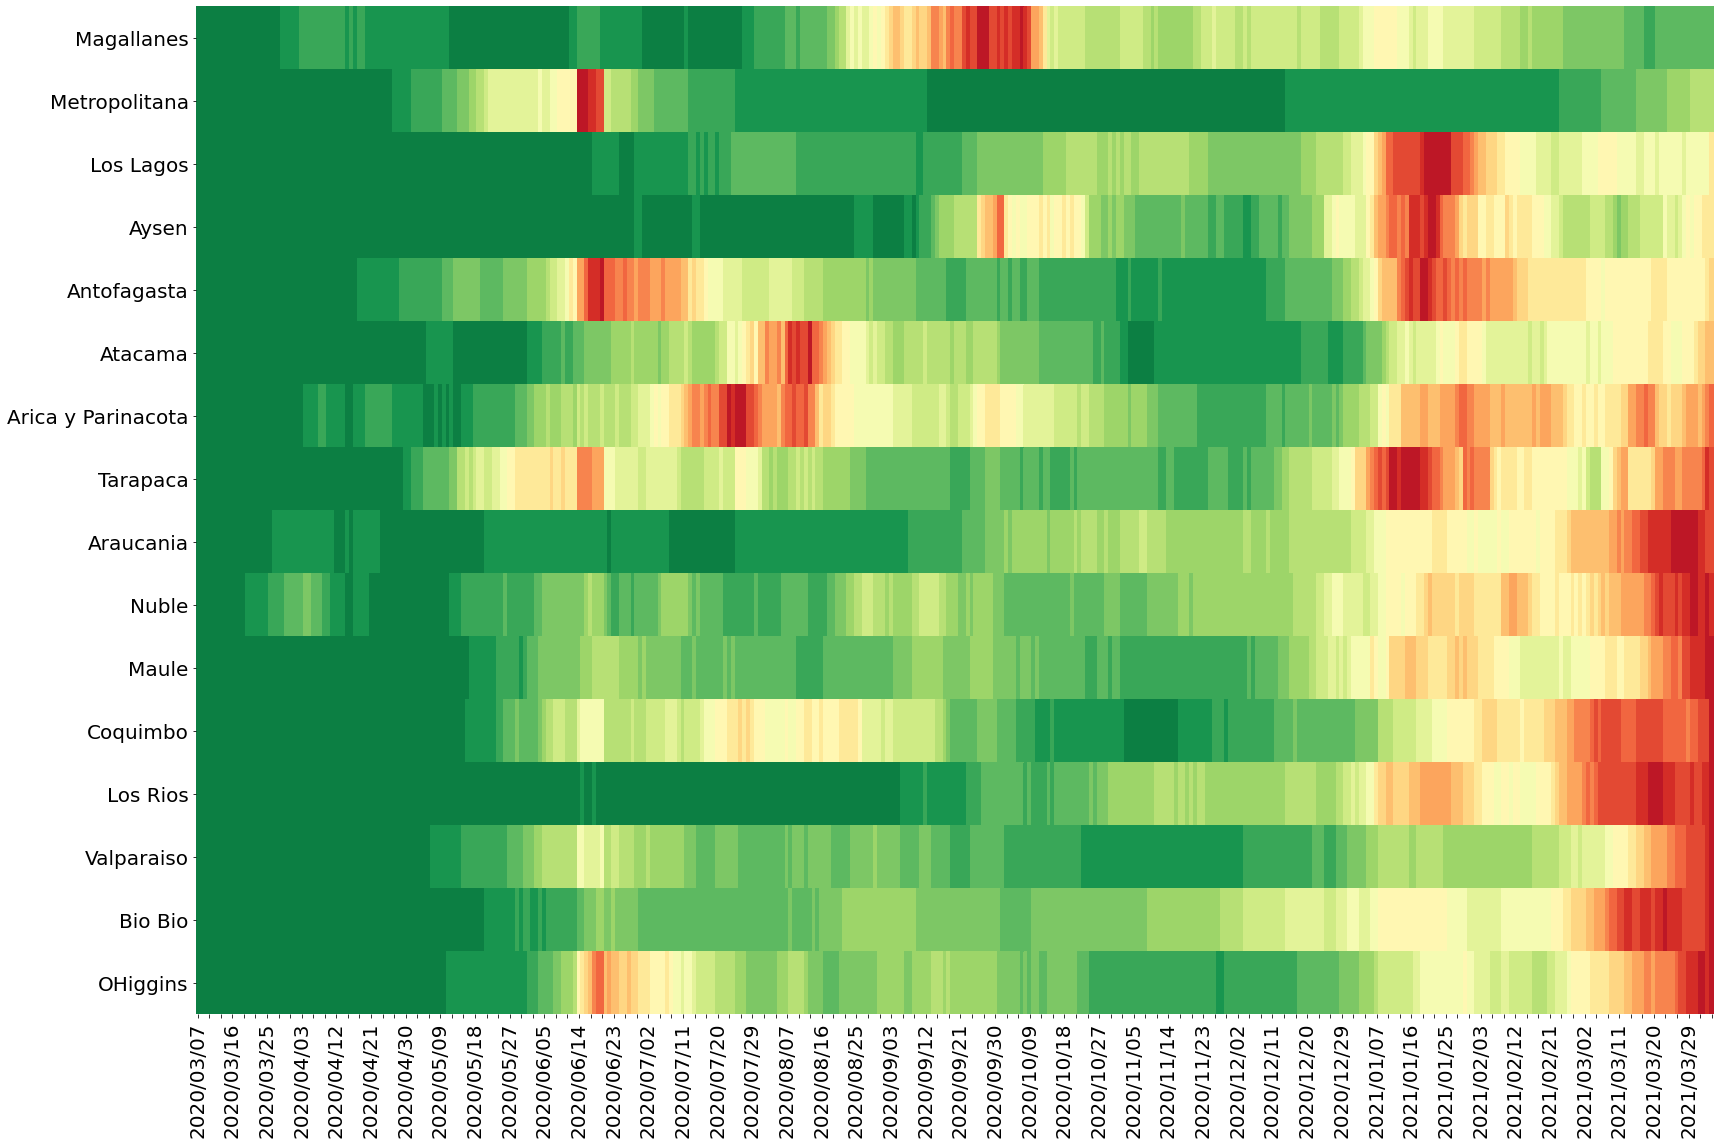

In [115]:
from pdb import set_trace as b
# df.drop(['Taiwan*','Diamond Princess','MS Zaandam','Tanzania','Niger'], axis=1, inplace=True)
# df = df.T[df.sum()>1000].T
df['time'] = pd.to_datetime(df.time)
df.index = df_new.time.dt.strftime('%Y/%m/%d')
print(df_new.index)
#b()
df.drop('time', axis=1, inplace=True)

mean = df.copy()
for i in list(df):
    mean[i] = df[i].rolling(window=7, min_periods=1, center=True).mean()    
    
fig, ax=plt.subplots(figsize=(24,16))
cmap=sns.color_palette('RdYlGn_r', 20)
sns.heatmap((mean/mean.max()).T.iloc[:,3:].sort_values(df.index[-1]),
           vmin=0, vmax=1, cmap=cmap, cbar=False)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=20)

for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 3 != 0:
        label.set_visible(False)

plt.tight_layout()
plt.savefig(r'figures/Relative_fire_world_%s.png'%date,dpi=100)

In [119]:
df_new

Magallanes  Maule  Arica y Parinacota  Tarapaca  Coquimbo  \
time                                                                    
2020/03/04           0      1                   0         0         0   
2020/03/05           0      0                   0         0         0   
2020/03/06           0      0                   0         0         0   
2020/03/07           0      0                   0         0         0   
2020/03/08           0      1                   0         0         0   
...                ...    ...                 ...       ...       ...   
2021/03/31          20    495                  78       219        76   
2021/04/01          29    441                 148       228       185   
2021/04/02          48    621                  84       165       286   
2021/04/03          42    569                  54       202       235   
2021/04/04          39    566                  87       160       220   

            Los Rios  Valparaiso  Los Lagos  Nuble  Atacama  Bio Bio  Aysen  \
time                                                                          
2020/03/04         0           0          0      0        0        0      0   
2020/03/05         0           0          0      0        0        0      0   
2020/03/06         0           0          0      0        0        0      0   
2020/03/07         0           0          1      0        0        0      0   
2020/03/08         0           0          0      0        0        0      0   
...              ...         ...        ...    ...      ...      ...    ...   
2021/03/31       196         582        136    214       95      501     23   
2021/04/01       262         976        427    171       55      952     32   
2021/04/02       409         875        384    187      100      837     20   
2021/04/03       293         730        286    199      116      908     16   
2021/04/04       233         726        365    125      115      795     23   

            Araucania  Antofagasta  OHiggins  Metropolitana  
time                                                         
2020/03/04          0            0         0              1  
2020/03/05          0            0         0              1  
2020/03/06          0            0         0              1  
2020/03/07          0            0         0              1  
2020/03/08          0            0         0              2  
...               ...          ...       ...            ...  
2021/03/31        530          114       274           2493  
2021/04/01        494          230       316           2922  
2021/04/02        539          211       412           2901  
2021/04/03        532          201       385           3225  
2021/04/04        480          215       378           2780  

[397 rows x 16 columns]

In [143]:
# fig, ax = plt.subplots(4, 4)

for i, column in enumerate(df_new.columns):
    if i > 3: 
        break
    print(i)
    yy = df_new[column]
    xx = dfs['Magallanes']['time'][1:] # df_new['time']
    
    row = int(i / 4)
    col = i % 4
    
    # ax[row, col].plot(xx, yy)
    # ax[row, col].set_title(column)
    
    plt.plot_date(xx, yy)
    plt.title(column)
    plt.savefig(f'figures/chile_{column}.jpg')
    plt.clf()
    
    print('done)')

#plt.savefig('figures/chile_provinces.png')

0
done)
1
done)
2
done)
3
done)


<Figure size 432x288 with 0 Axes>

In [144]:
date

'_04_04'

In [149]:
df_cum.columns

Index(['time', 'Magallanes', 'Maule', 'Arica y Parinacota', 'Tarapaca',
       'Coquimbo', 'Los Rios', 'Valparaiso', 'Los Lagos', 'Nuble', 'Atacama',
       'Bio Bio', 'Aysen', 'Araucania', 'Antofagasta', 'OHiggins',
       'Metropolitana'],
      dtype='object')

<ipython-input-2-f456bed42899>:40: MatplotlibDeprecationWarning: ScaleBase got an unexpected keyword argument 'basey'. This will become an error in 3.4.
  ax.set_yscale('linear', basey=2)


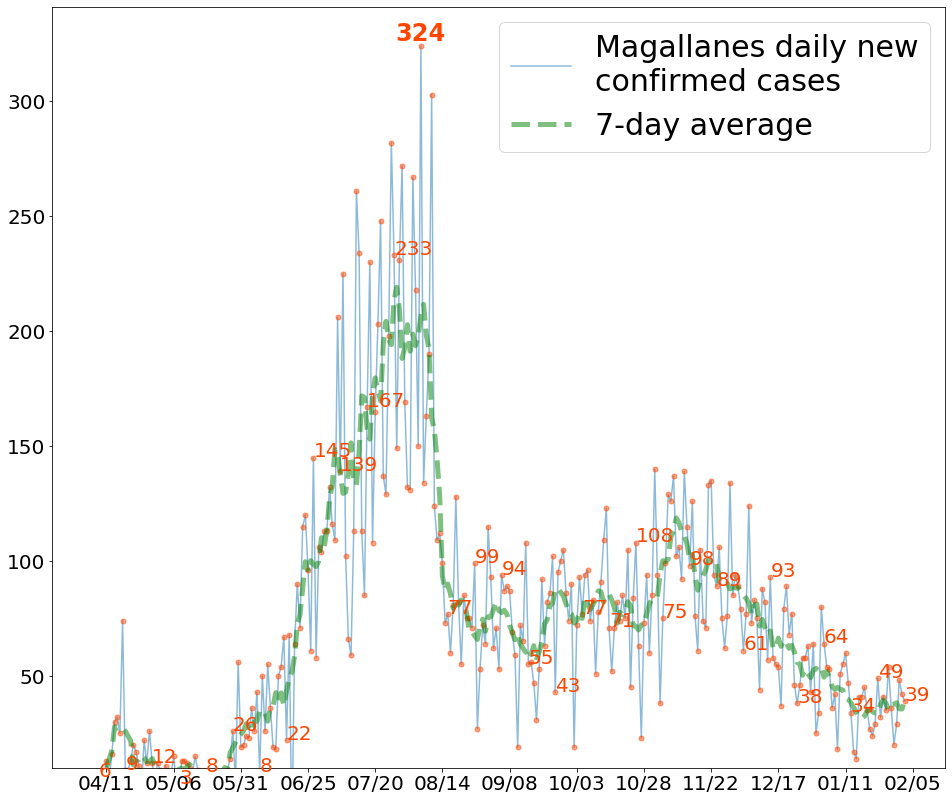

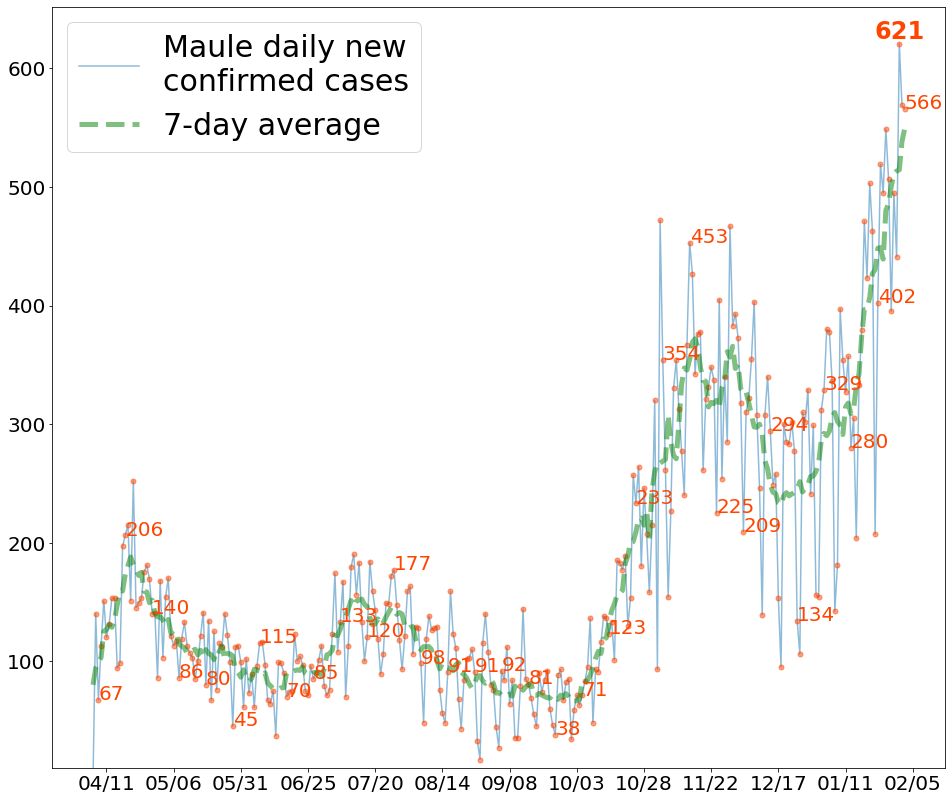

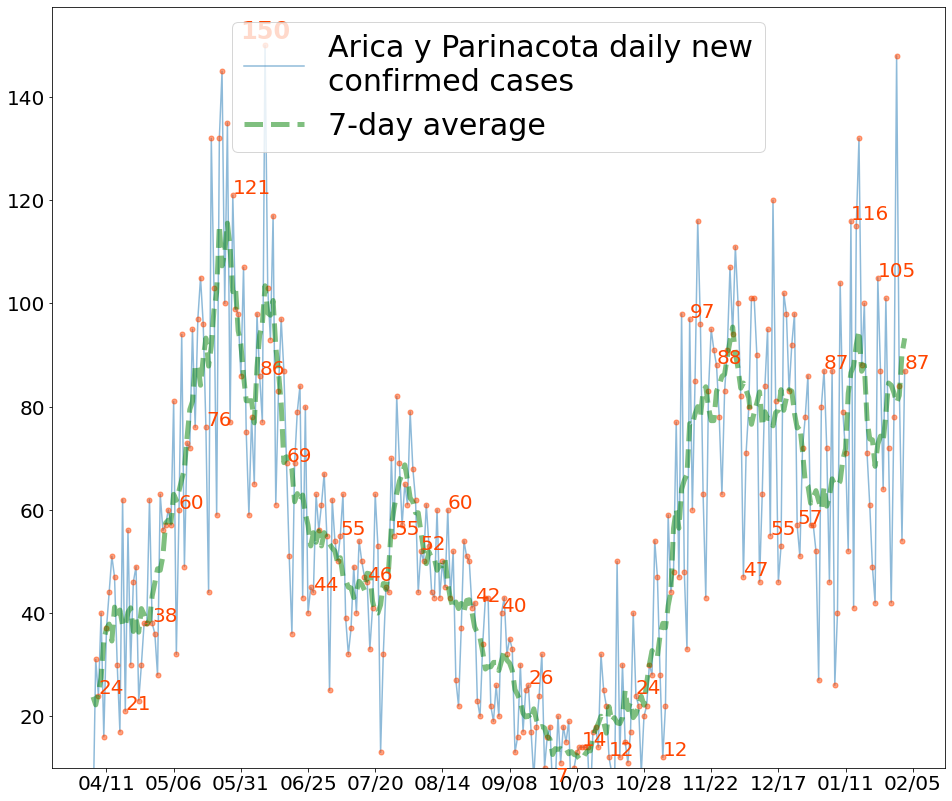

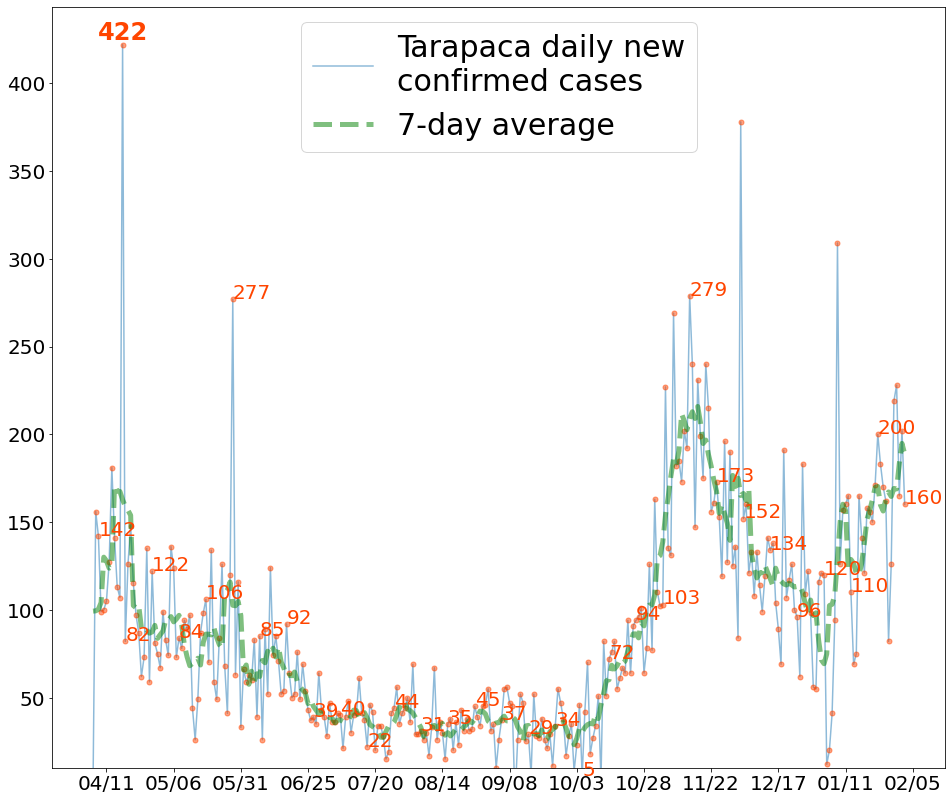

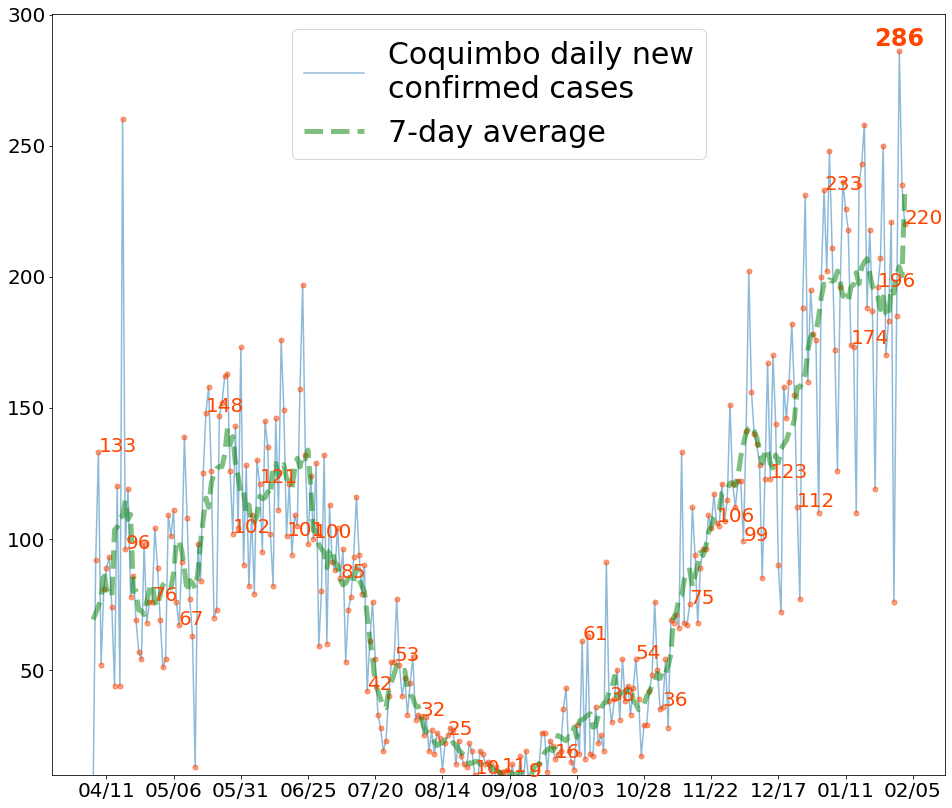

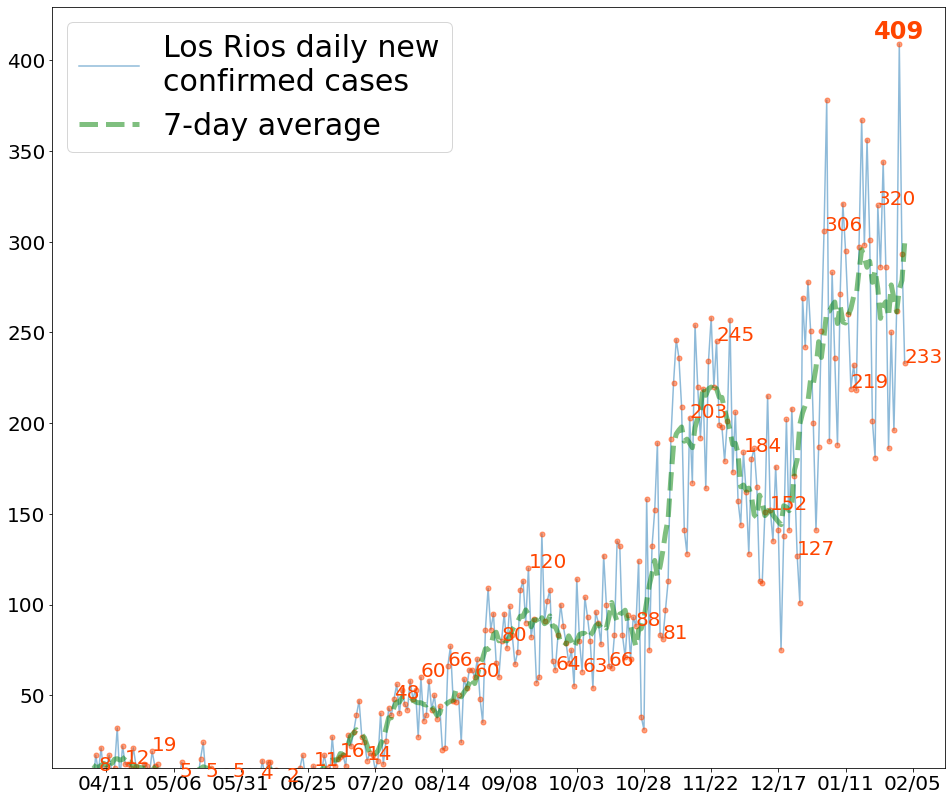

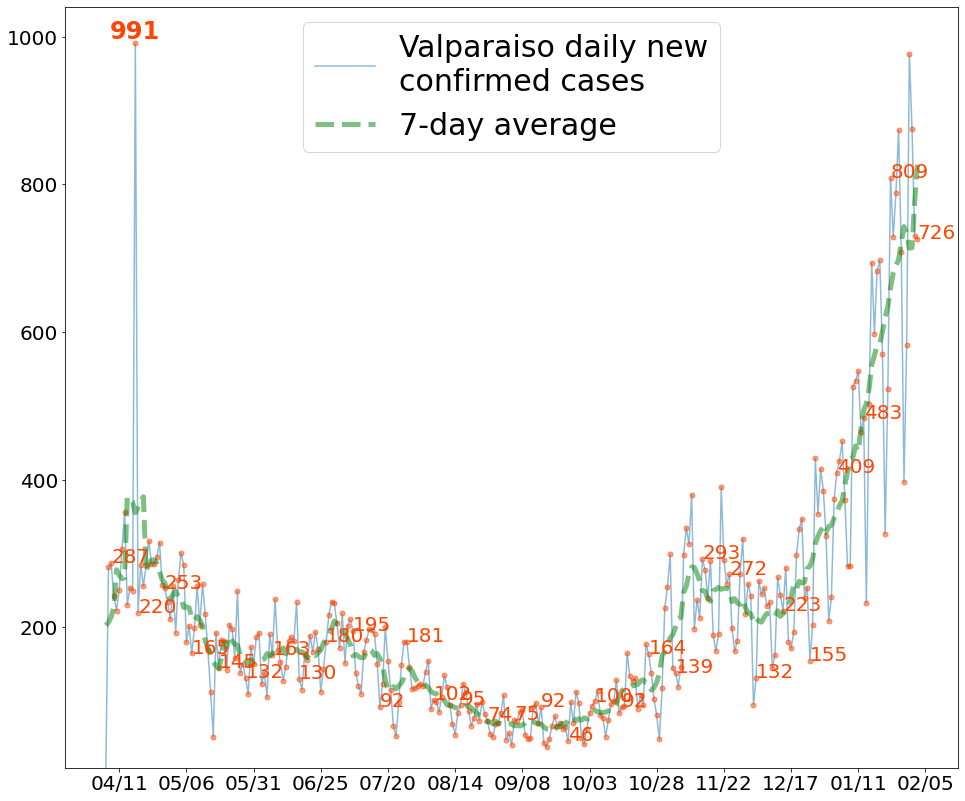

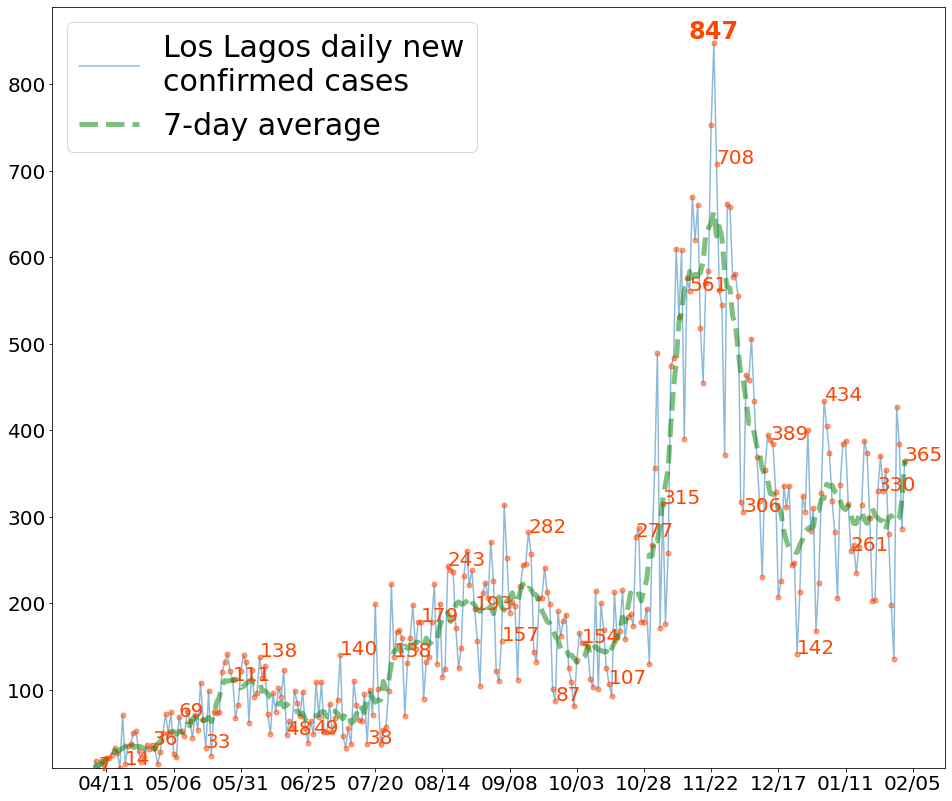

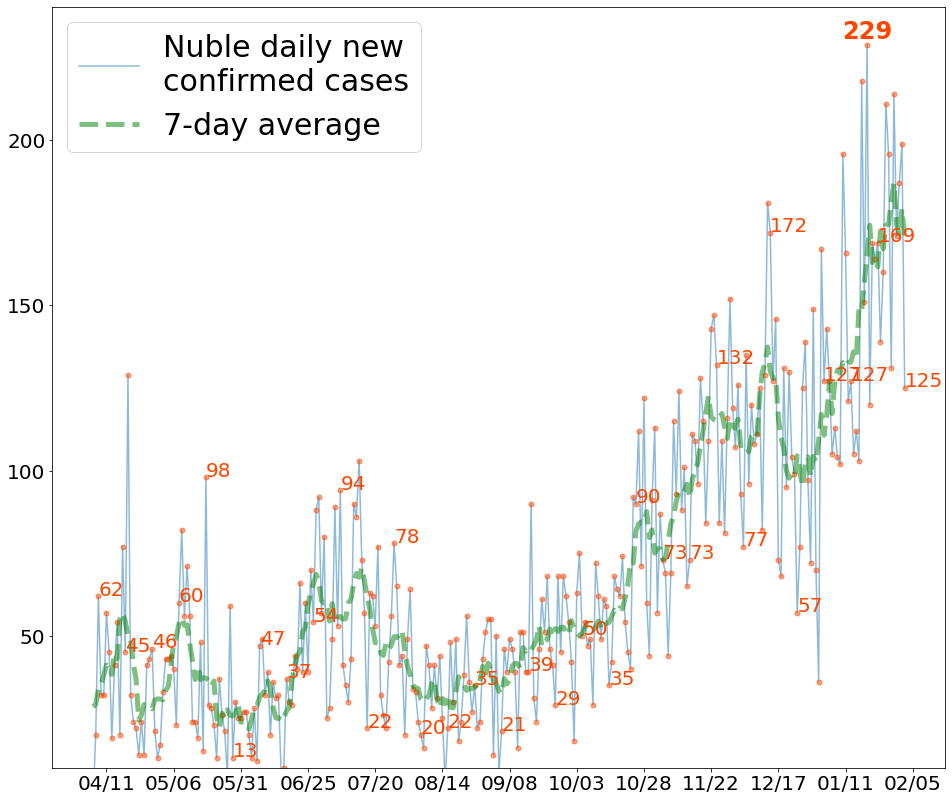

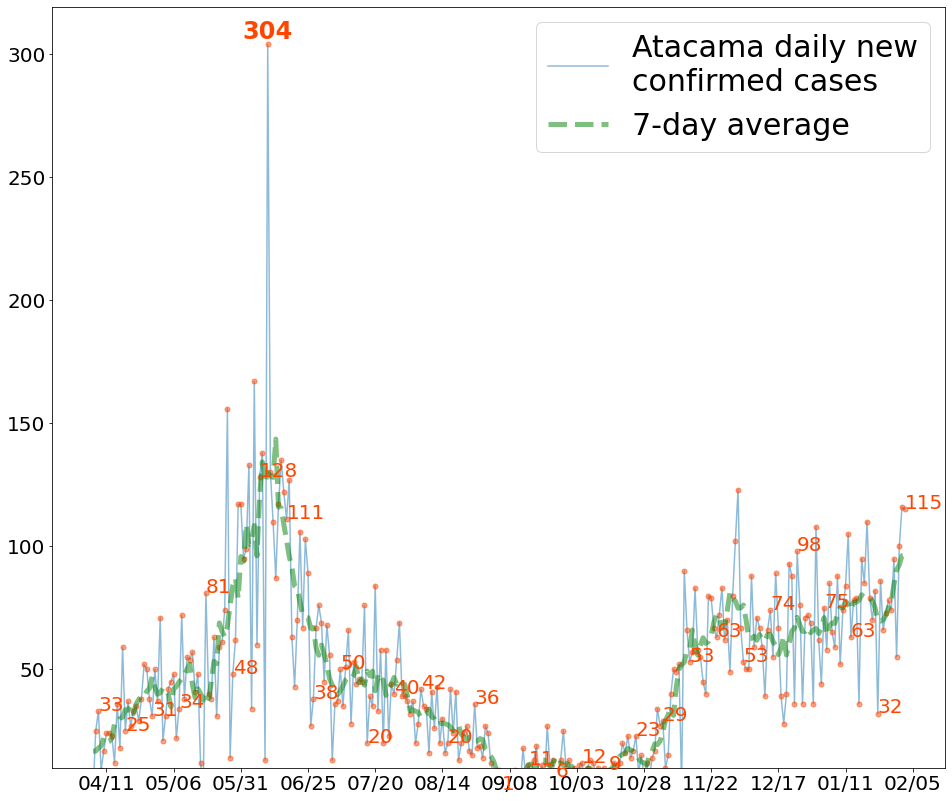

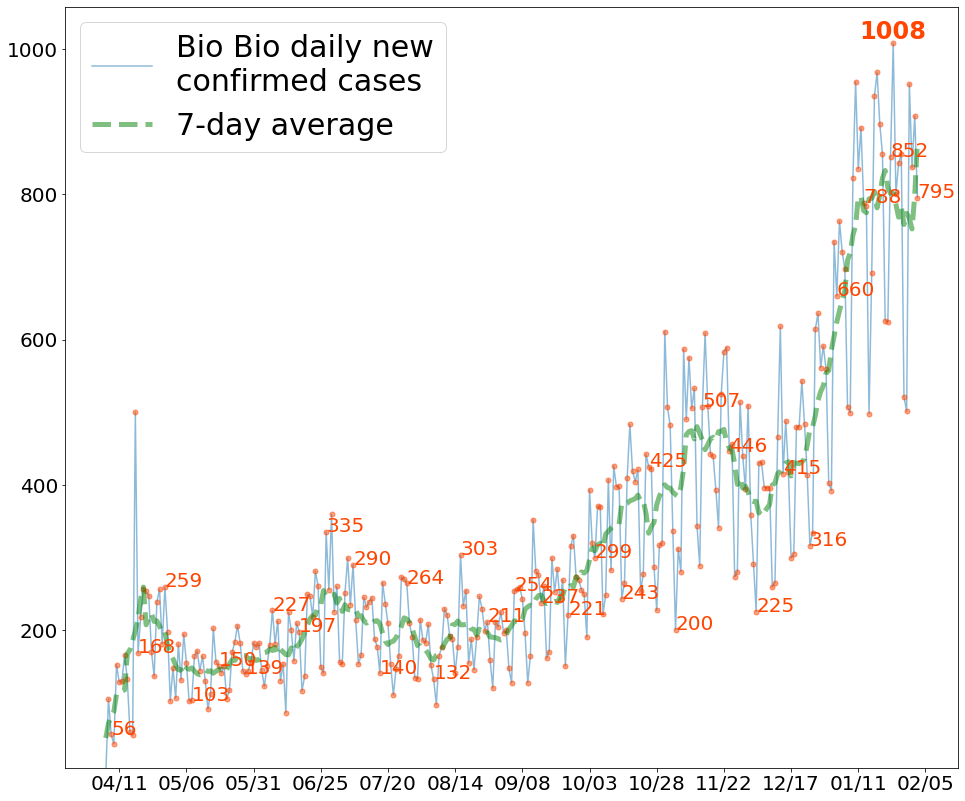

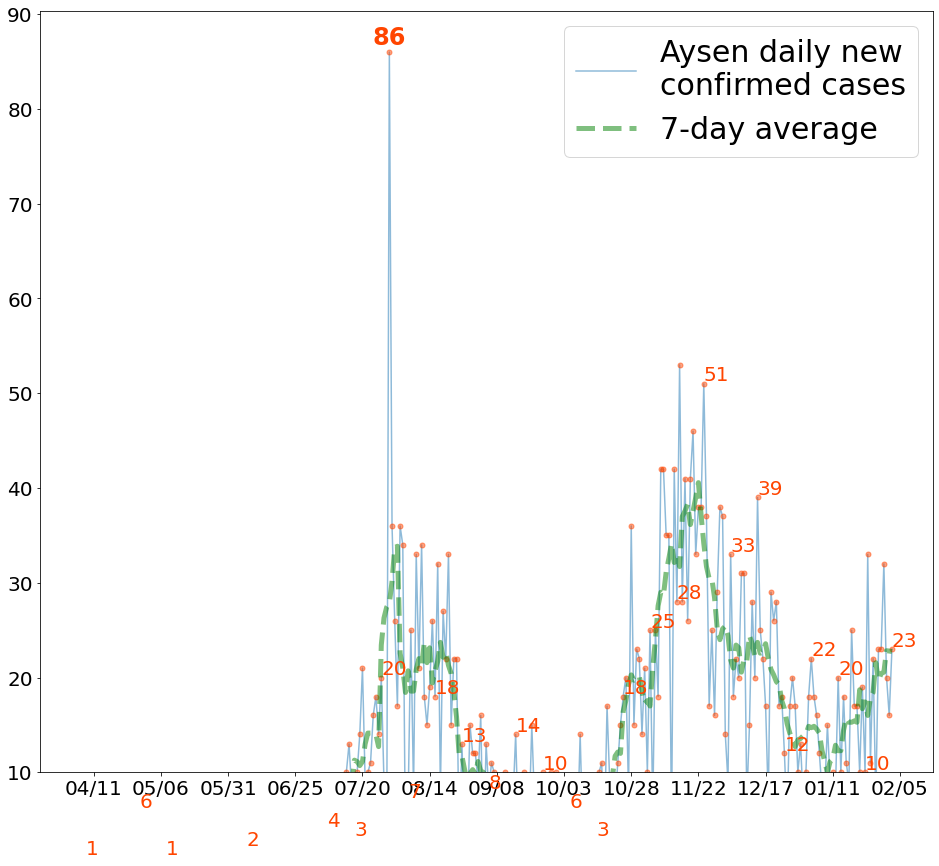

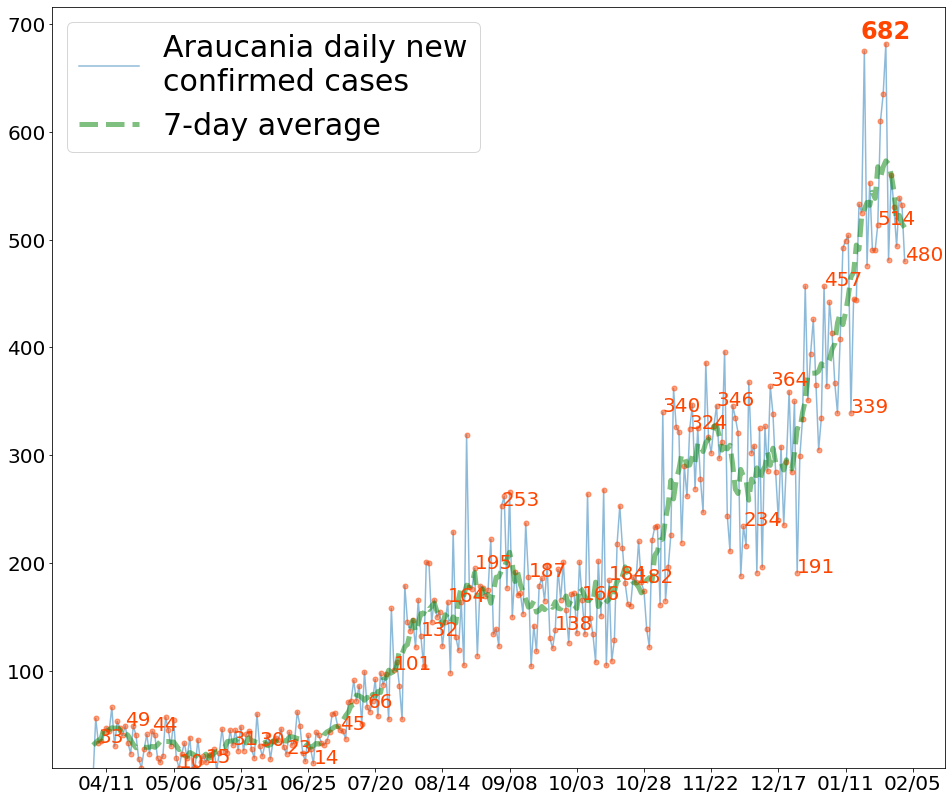

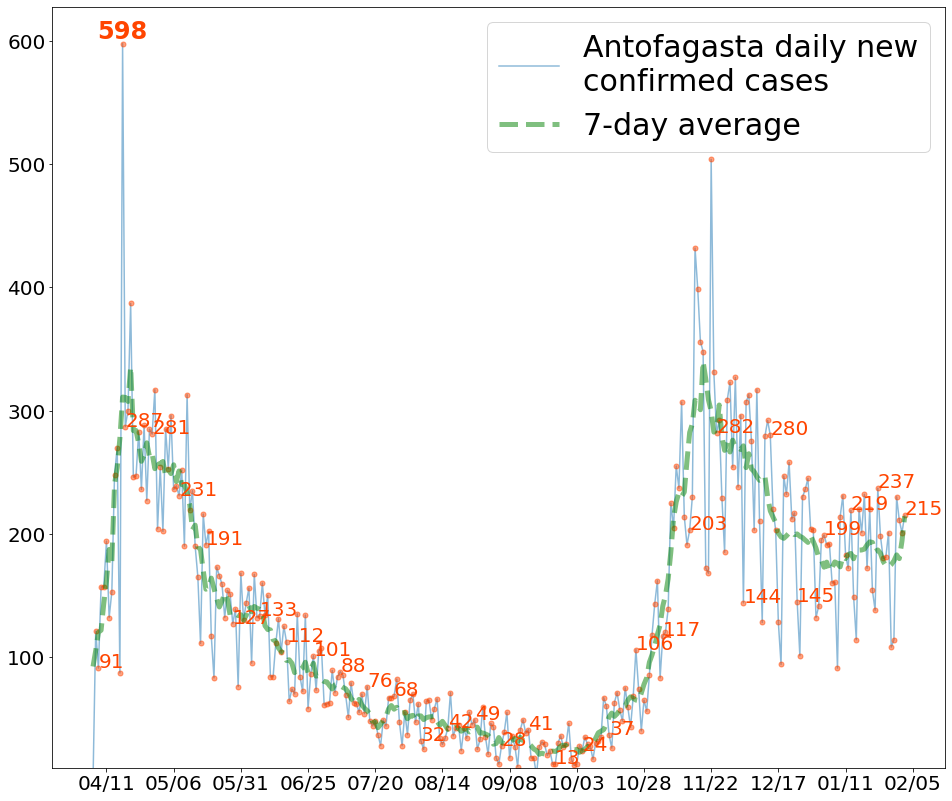

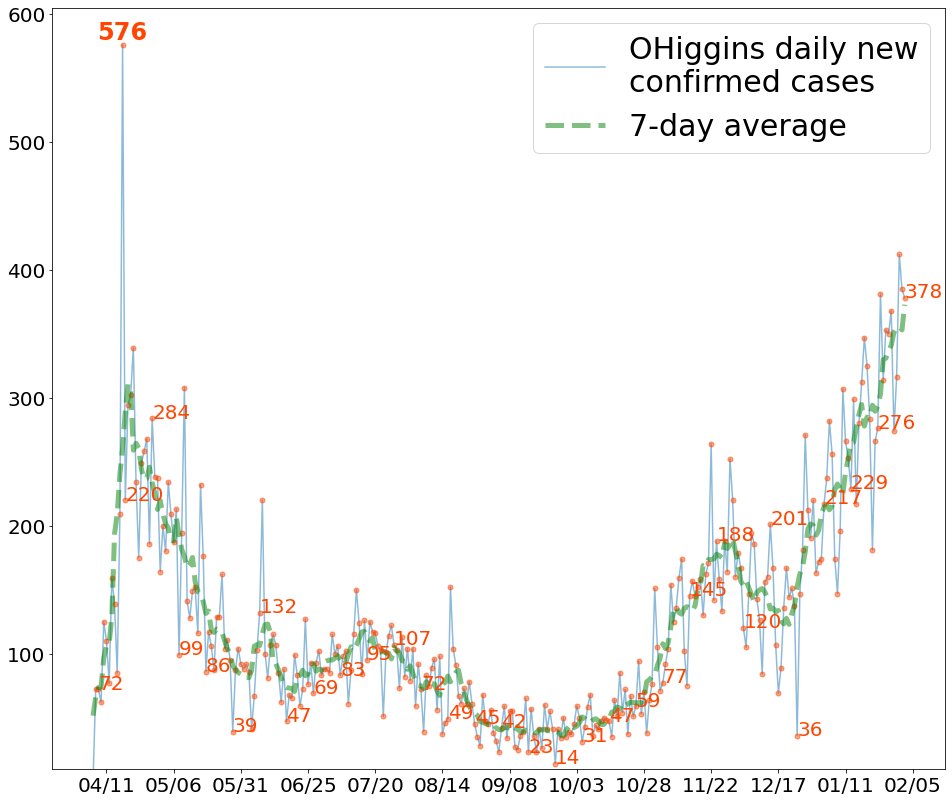

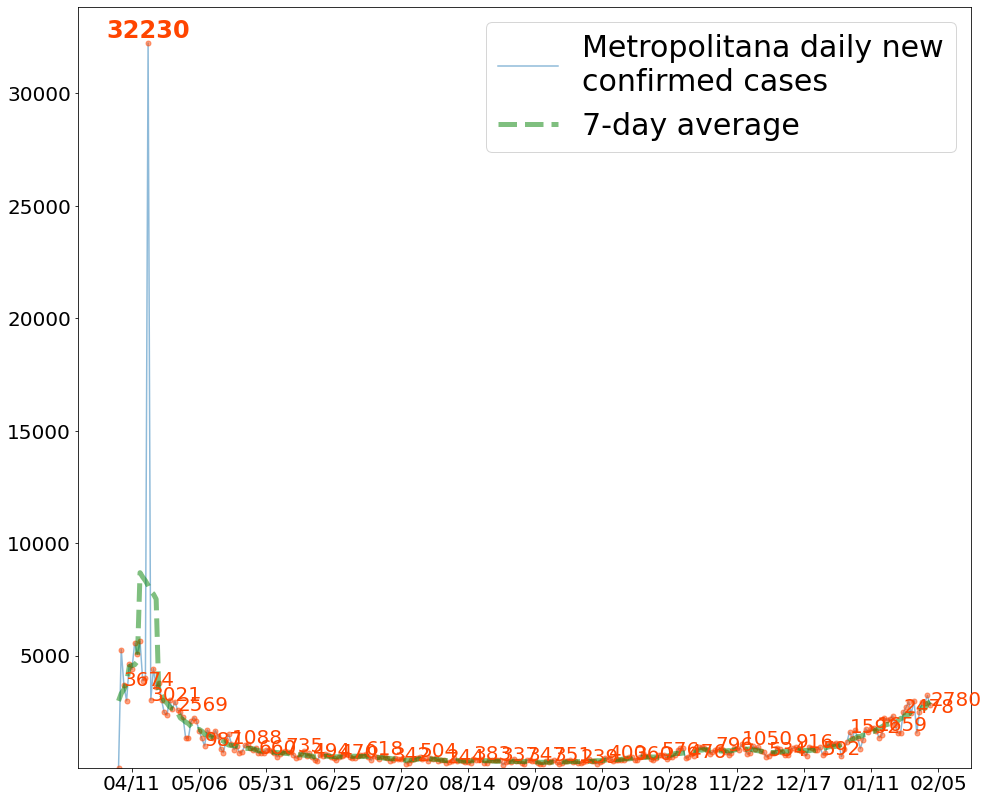

In [150]:
#region = 'Magallanes'
for region in df_cum.columns[1:]:
    
    lineplot_cases(region, df_cum, date, tick_interval=10, start_case=0, save=True, offset=95, bottom=True, insert = False, log=False, height=14)

In [137]:
for i, column in enumerate(df_new.columns):
    print(i, column)

0 Magallanes
1 Maule
2 Arica y Parinacota
3 Tarapaca
4 Coquimbo
5 Los Rios
6 Valparaiso
7 Los Lagos
8 Nuble
9 Atacama
10 Bio Bio
11 Aysen
12 Araucania
13 Antofagasta
14 OHiggins
15 Metropolitana


In [126]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

# US Fire Plot

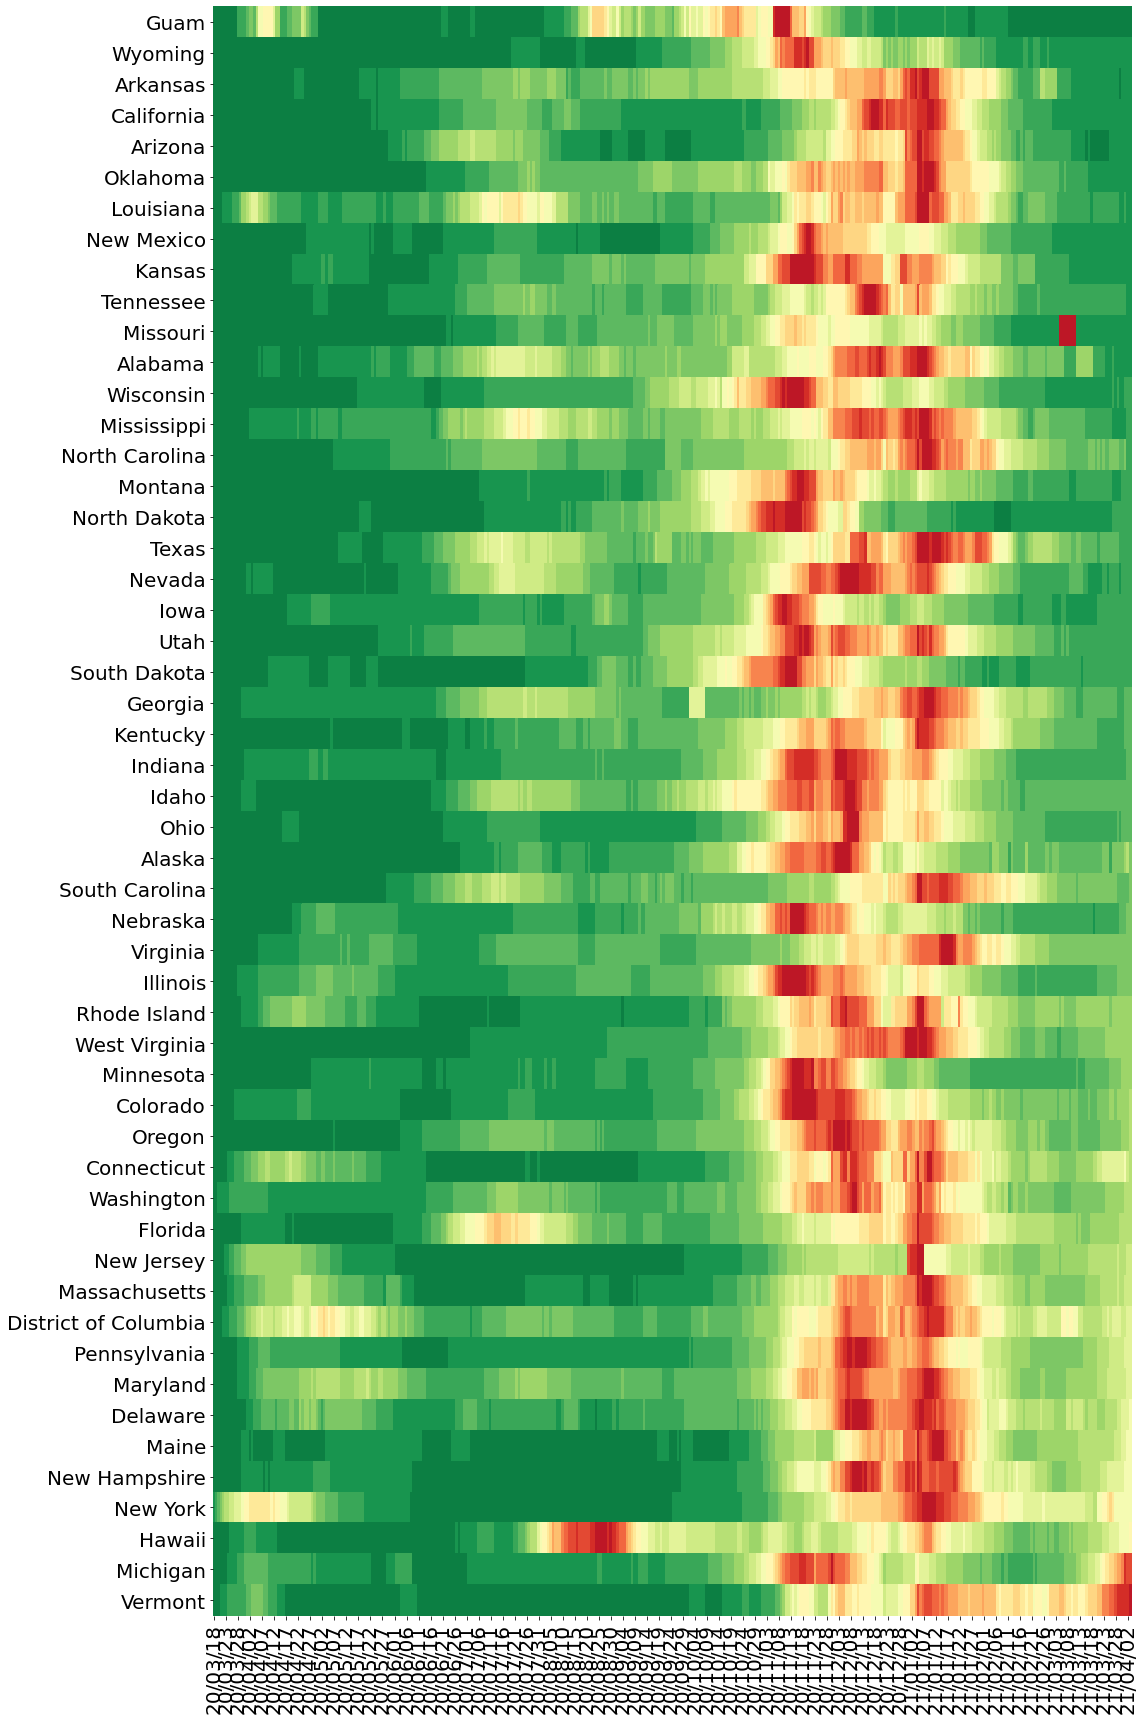

In [12]:
from pdb import set_trace as b

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df = df.pivot(index='date',columns='state',values='cases').iloc[32:]
df = df[df.iloc[-1].sort_values(ascending=False).index]
for i in list(df):
    df[i] = df[i] - df[i].shift(1)
    
df.index.rename('US', inplace=True)
# b()
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%y/%m/%d')
df.drop('time', axis=1, inplace=True)

mean = df.copy()

for i in list(df):
    mean[i] = df[i].rolling(window=7, min_periods=1, center=True).mean()    
    
fig, ax=plt.subplots(figsize=(16,24))
cmap=sns.color_palette('RdYlGn_r', 20)

sns.heatmap((mean/mean.max()).T.iloc[:,25:].sort_values(df.index[-1]).drop(['Northern Mariana Islands','Puerto Rico','Virgin Islands']),
           vmin=0, vmax=1, cmap=cmap, cbar=False)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig(r'figures/Relative_fire_US_%s.png'%date,dpi=100)

In [13]:
df

state     California   Texas  Florida  New York  Illinois  Pennsylvania  \
time                                                                      
20/02/22         NaN     NaN      NaN       NaN       NaN           NaN   
20/02/23         0.0     0.0      NaN       NaN       0.0           NaN   
20/02/24         2.0     6.0      NaN       NaN       0.0           NaN   
20/02/25         0.0     0.0      NaN       NaN       0.0           NaN   
20/02/26        15.0     0.0      NaN       NaN       0.0           NaN   
...              ...     ...      ...       ...       ...           ...   
21/03/30      2378.0  3452.0   5062.0    5750.0    2377.0        5374.0   
21/03/31      2507.0  4098.0   5294.0    7683.0    2585.0        4457.0   
21/04/01      2642.0  3610.0   6790.0    9173.0    3696.0        3848.0   
21/04/02      3714.0  2252.0   6490.0    8055.0    3037.0        4086.0   
21/04/03      2939.0  1661.0   6017.0    7711.0    2739.0        5344.0   

state     Georgia    Ohio  New Jersey  North Carolina  ...  New Hampshire  \
time                                                   ...                  
20/02/22      NaN     NaN         NaN             NaN  ...            NaN   
20/02/23      NaN     NaN         NaN             NaN  ...            NaN   
20/02/24      NaN     NaN         NaN             NaN  ...            NaN   
20/02/25      NaN     NaN         NaN             NaN  ...            NaN   
20/02/26      NaN     NaN         NaN             NaN  ...            NaN   
...           ...     ...         ...             ...  ...            ...   
21/03/30   1334.0  2458.0      4873.0          1539.0  ...          374.0   
21/03/31   1807.0  1989.0      3668.0          2040.0  ...          462.0   
21/04/01   1514.0  2475.0      5608.0          2100.0  ...          363.0   
21/04/02   1651.0  1677.0      4529.0             0.0  ...          471.0   
21/04/03   1281.0  2293.0      4445.0             0.0  ...          438.0   

state     Alaska  Wyoming  Maine  District of Columbia  Hawaii  Vermont  Guam  \
time                                                                            
20/02/22     NaN      NaN    NaN                   NaN     NaN      NaN   NaN   
20/02/23     NaN      NaN    NaN                   NaN     NaN      NaN   NaN   
20/02/24     NaN      NaN    NaN                   NaN     NaN      NaN   NaN   
20/02/25     NaN      NaN    NaN                   NaN     NaN      NaN   NaN   
20/02/26     NaN      NaN    NaN                   NaN     NaN      NaN   NaN   
...          ...      ...    ...                   ...     ...      ...   ...   
21/03/30   651.0     46.0  223.0                 165.0    63.0    107.0   1.0   
21/03/31   164.0     74.0  251.0                 100.0    90.0    166.0   2.0   
21/04/01   226.0     79.0  284.0                 143.0   109.0    248.0   3.0   
21/04/02   202.0     58.0  401.0                 151.0   252.0    232.0   2.0   
21/04/03     0.0      0.0  279.0                 125.0   106.0    150.0   4.0   

state     Virgin Islands  Northern Mariana Islands  
time                                                
20/02/22             NaN                       NaN  
20/02/23             NaN                       NaN  
20/02/24             NaN                       NaN  
20/02/25             NaN                       NaN  
20/02/26             NaN                       NaN  
...                  ...                       ...  
21/03/30             0.0                       0.0  
21/03/31             0.0                       0.0  
21/04/01             0.0                       0.0  
21/04/02             0.0                       0.0  
21/04/03             0.0                       0.0  

[407 rows x 55 columns]

# Real time Rt estimation

In [ ]:
k = np.array([20, 40, 55, 90])
GAMMA = 1/7

def get_Rt_most_liky_values(k, GAMMA=1/7):
    R_T_MAX = 12
    r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)
    lam = k[:-1] * np.exp(GAMMA * (r_t_range[:, None] - 1))
    likelihood_r_t = sps.poisson.pmf(k[1:], lam)
    likelihood_r_t /= np.sum(likelihood_r_t, axis=0)

    posteriors = likelihood_r_t.cumprod(axis=1)
    posteriors = posteriors / np.sum(posteriors, axis=0)

    columns = pd.Index(range(1, posteriors.shape[1]+1), name='Day')
    posteriors = pd.DataFrame(
        data = posteriors,
        index = r_t_range,
        columns = columns)

    most_likely_values = posteriors.idxmax(axis=0)
    return most_likely_values

In [ ]:
cut = 35
country = 'Germany'

k = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T[country]\
    .rolling(7,win_type='gaussian',min_periods=1,center=True).mean(std=2).round().diff()[-cut:].values

R_T_MAX = 6
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*50+1)
lam = k[:-1] * np.exp(GAMMA * (r_t_range[:, None] - 1))
likelihood_r_t = sps.poisson.pmf(k[1:], lam)
likelihood_r_t /= np.sum(likelihood_r_t, axis=0)

posteriors = likelihood_r_t.cumprod(axis=1)
posteriors = posteriors / np.sum(posteriors, axis=0)

columns = pd.Index(range(1, posteriors.shape[1]+1), name='Day')
posteriors = pd.DataFrame(
    data = posteriors,
    index = r_t_range,
    columns = columns)

most_likely_values = posteriors.idxmax(axis=0)
most_likely_values[-5:]

hdis = highest_density_interval(posteriors, p=.9)
most_likely = posteriors.idxmax().rename('ML')
result = pd.concat([most_likely, hdis], axis=1)
result.index= pd.to_datetime(list(pd.read_csv('data/JH/confirm_agg.csv'))[-cut+1:])
result.index.rename('date', inplace=True)

fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(result, ax, state_name)
ax.set_title(f'Real-time $R_t$ for {state_name}')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [ ]:
def plot_rt(result, ax, state_name):
    ax.set_title(f"{state_name}")
    
    # Colors
    ABOVE = [1,0,0]
    MIDDLE = [1,1,1]
    BELOW = [0,0,0]
    cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
    color_mapped = lambda y: np.clip(y, .5, 1.5)-.5
    
    index = result['ML'].index.get_level_values('date')
    values = result['ML'].values
    
    # Plot dots and line
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)
    
    # Aesthetically, extrapolate credible interval by 1 day either side
    lowfn = interp1d(date2num(index),
                     result['Low_90'].values,
                     bounds_error=False,
                     fill_value='extrapolate')
    
    highfn = interp1d(date2num(index),
                      result['High_90'].values,
                      bounds_error=False,
                      fill_value='extrapolate')
    
    extended = pd.date_range(start=pd.Timestamp(str(result.index[0].date())),
                             end=index[-1]+pd.Timedelta(days=1))
    
    ax.fill_between(extended,
                    lowfn(date2num(extended)),
                    highfn(date2num(extended)),
                    color='k',
                    alpha=.1,
                    lw=0,
                    zorder=3)

    ax.axhline(1.0, c='k', lw=1, label='$R_t=1.0$', alpha=.25)
    
#     # Formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(0)
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.margins(0)
    ax.set_ylim(bottom=0)
    fig.set_facecolor('w')
    
fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(result, ax, state_name)
ax.set_title(f'Real-time $R_t$ for {state_name}')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))